In [318]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [319]:
# Loading the data and creating a combined dataframe
df_gill = pd.read_csv('/content/drive/MyDrive/India vs England/Shubman Gill.csv')
df_jaiswal = pd.read_csv('/content/drive/MyDrive/India vs England/Jaiswal.csv')
df_pant = pd.read_csv('/content/drive/MyDrive/India vs England/Pant.csv')
df_rahul = pd.read_csv('/content/drive/MyDrive/India vs England/Rahul.csv')
df_nair = pd.read_csv('/content/drive/MyDrive/India vs England/Nair.csv')
df_nkr = pd.read_csv('/content/drive/MyDrive/India vs England/Nitish Reddy.csv')

df_gill['Batter'] = 'Shubman Gill'
df_jaiswal['Batter'] = 'Yashasvi Jaiswal'
df_rahul['Batter'] = 'KL Rahul'
df_pant['Batter'] = 'Rishabh Pant'
df_nair['Batter'] = 'Karun Nair'
df_nkr['Batter'] = 'Nitish Reddy'

combined_df = pd.concat([df_gill, df_jaiswal, df_pant, df_rahul, df_nair, df_nkr], ignore_index = True)
combined_df['Spin Dismissal %'] = combined_df['Spin Dismissal'].str.rstrip('%').astype(float).round(2)
combined_df['Seam Dismissal %'] = combined_df['Seam Dismissal'].str.rstrip('%').astype(float).round(2)

In [320]:
# Adding a 'Region' column to differentiate between SENA/Subcontinent
def map_region(group):
    if 'In Australia' in group or 'In England' in group or 'In South Africa' in group or 'In New Zealand' in group:
        return 'SENA'
    elif 'In India' in group or 'In Sri Lanka' in group or 'In Bangladesh' in group or 'In Pakistan' in group:
        return 'Subcontinent'
    else:
        return 'Other'

combined_df['Region'] = combined_df['Grouping'].apply(map_region)

In [321]:
regional_stats = combined_df.groupby(['Batter', 'Region'], as_index = False).agg({
    'Mat': 'sum',
    'Inns': 'sum',
    'Not Out': 'sum',
    'Runs': 'sum',
    'BF': 'sum',
    '100s': 'sum',
    '50s': 'sum',
    'Seam Dismissal %': 'mean',
    'Spin Dismissal %': 'mean'
})

regional_stats['SR'] = ((regional_stats['Runs'] / regional_stats['BF']) * 100).round(2)
regional_stats['Avg'] = (regional_stats['Runs'] / (regional_stats['Inns'] - regional_stats['Not Out'])).round(2)
regional_stats['Balls/Dismissal'] = (regional_stats['BF'] / (regional_stats['Inns'] - regional_stats['Not Out'])).round(2)
regional_stats['Spin Dismissal %'] = regional_stats['Spin Dismissal %'].round(2)
regional_stats['Seam Dismissal %'] = regional_stats['Seam Dismissal %'].round(2)
regional_stats


,Batter,Region,Mat,Inns,Not Out,Runs,BF,100s,50s,Seam Dismissal %,Spin Dismissal %,SR,Avg,Balls/Dismissal
0,KL Rahul,Other,5,7,0,337,663,1,1,57.15,42.85,50.83,48.14,94.71
1,KL Rahul,SENA,26,50,1,1446,2993,5,4,92.59,7.41,48.31,29.51,61.08
2,KL Rahul,Subcontinent,27,44,3,1474,2512,2,12,53.59,46.41,58.68,35.95,61.27
3,Karun Nair,Subcontinent,6,7,1,374,506,1,0,33.33,50.00,73.91,62.33,84.33
4,Nitish Reddy,SENA,5,9,1,298,464,1,0,75.00,25.00,64.22,37.25,58.00
5,Rishabh Pant,Other,2,3,0,58,122,0,0,66.67,33.33,47.54,19.33,40.67
6,Rishabh Pant,SENA,26,48,3,1681,2539,4,5,81.96,18.04,66.21,37.36,56.42
7,Rishabh Pant,Subcontinent,15,24,2,1209,1343,2,10,18.42,78.94,90.02,54.95,61.05
8,Shubman Gill,Other,2,3,1,45,60,0,0,50.00,50.00,75.00,22.50,30.00
9,Shubman Gill,SENA,11,21,1,514,863,0,2,90.00,6.67,59.56,25.70,43.15


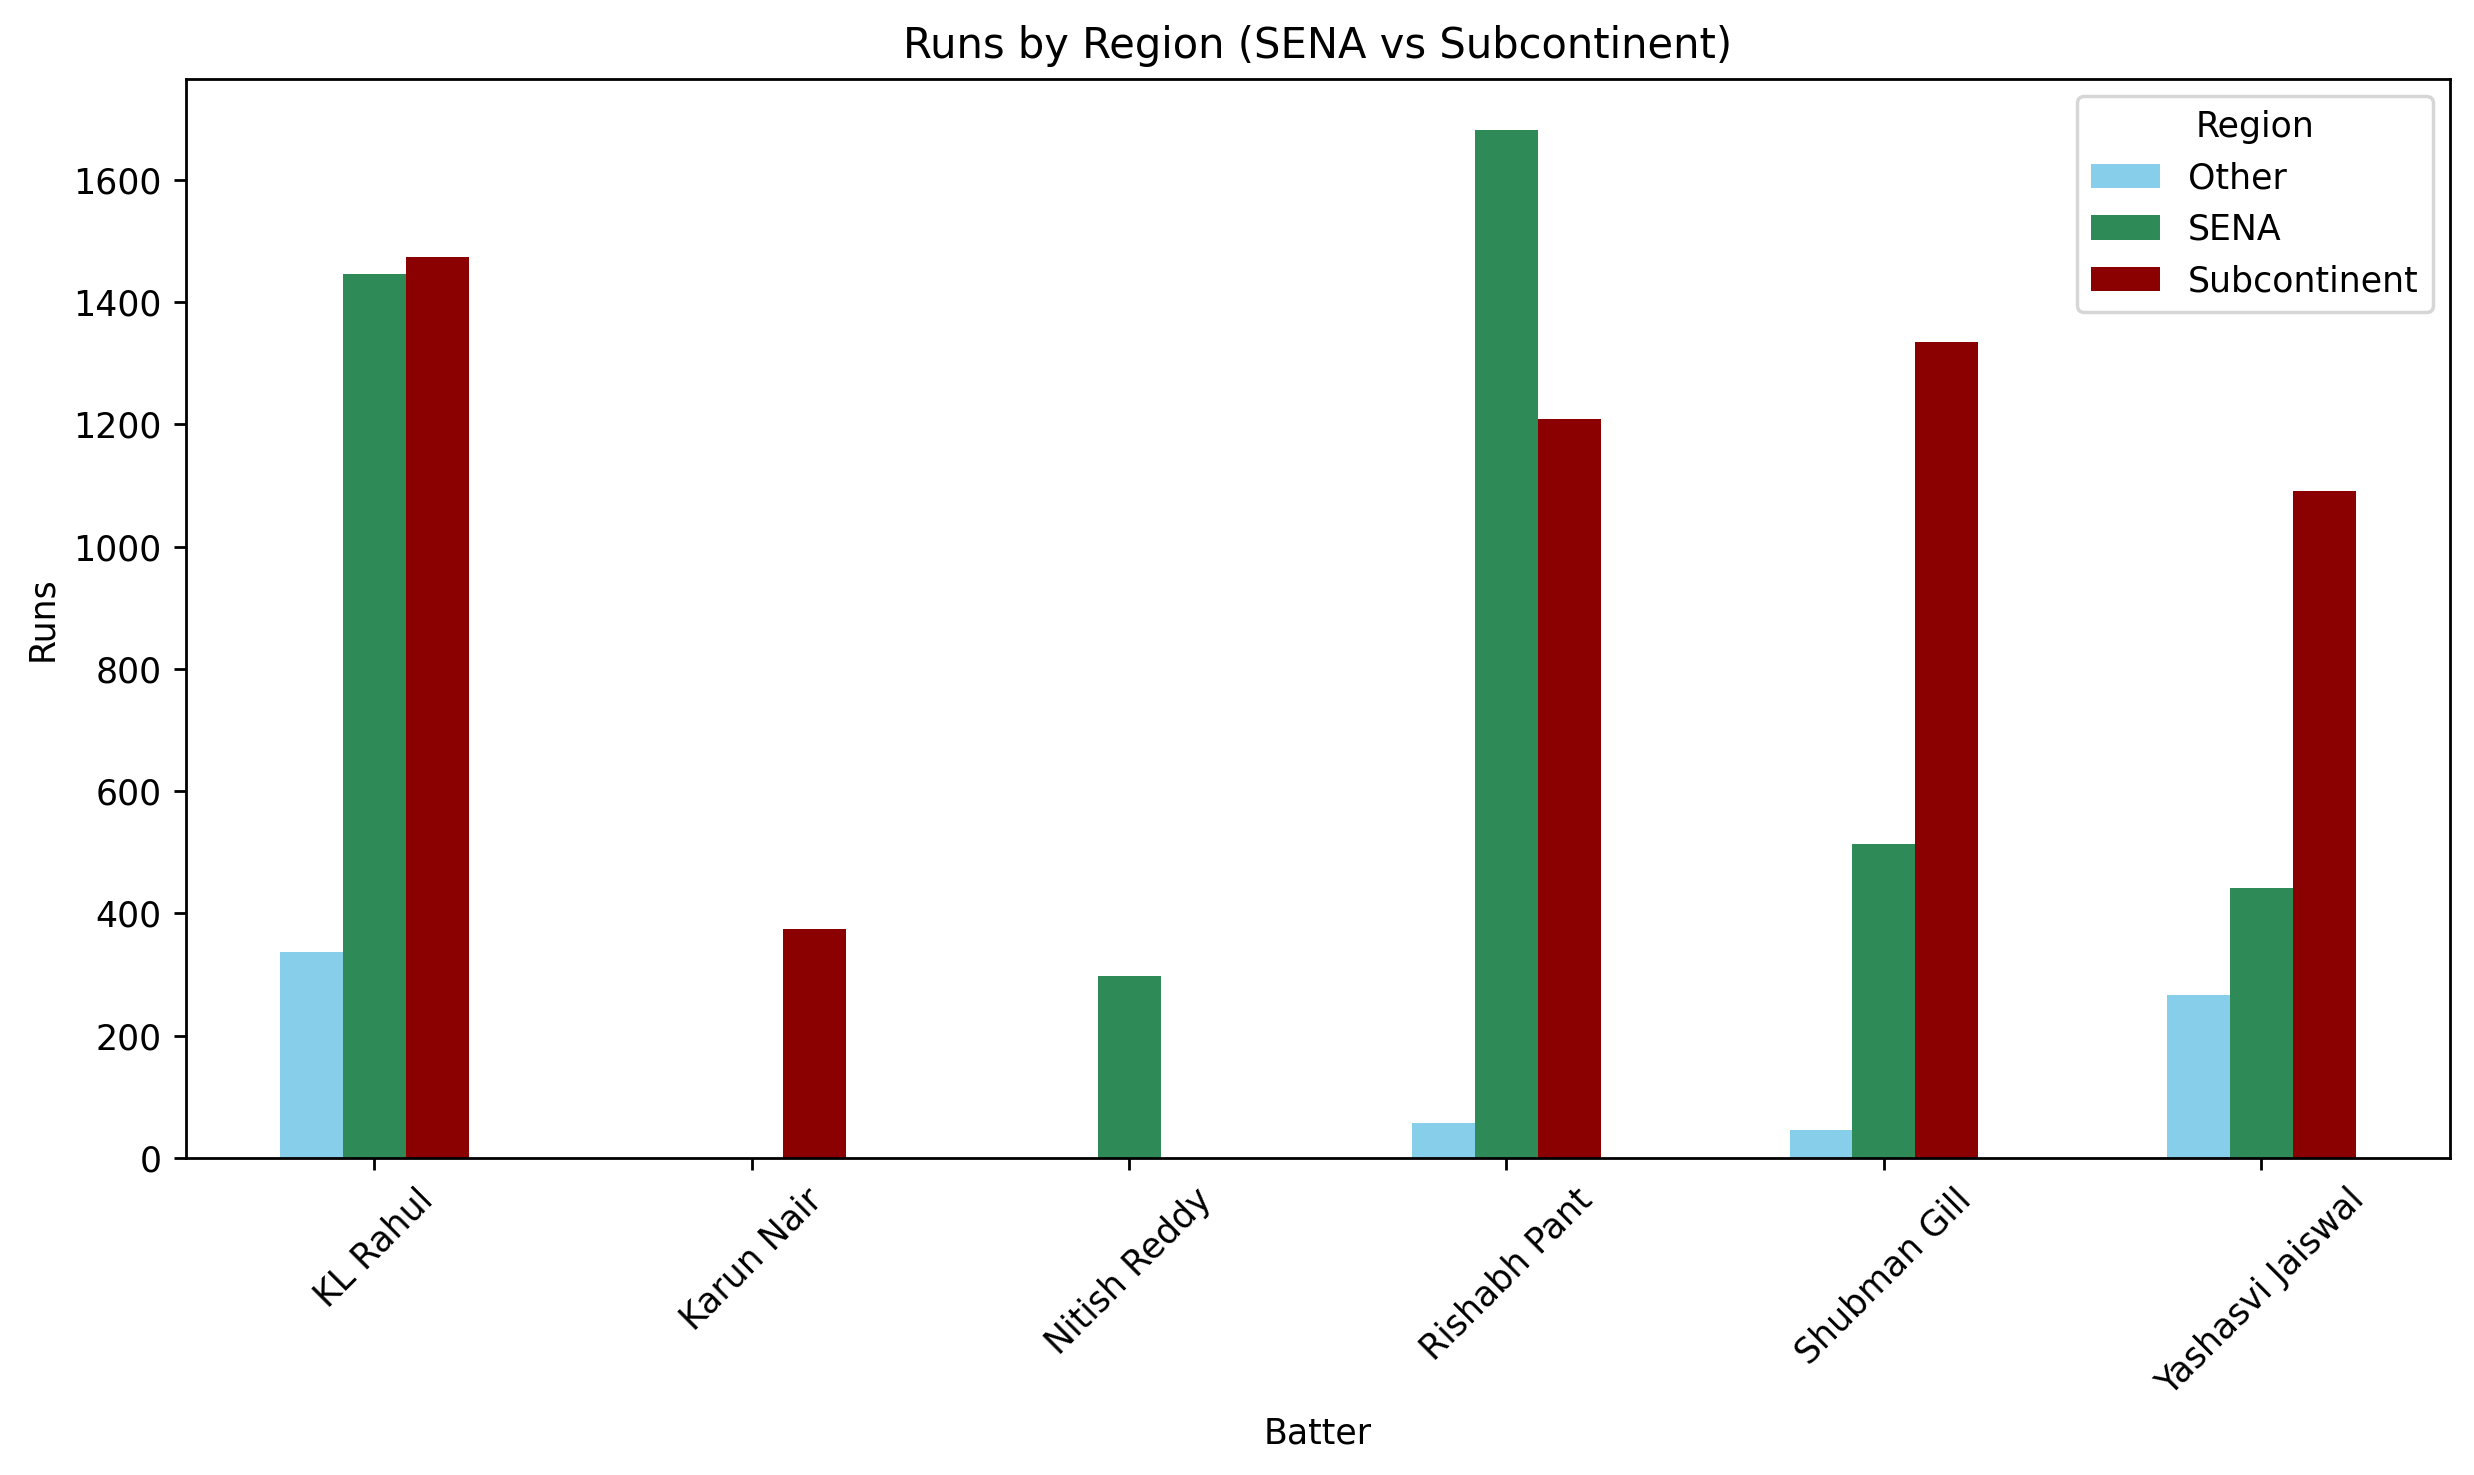

In [322]:
# Bar plot for runs in SENA vs Subcontinent

pivot_df_runs = regional_stats.pivot(index = 'Batter', columns = 'Region', values = 'Runs').fillna(0)

plt.figure(dpi = 250, figsize = (10, 6))
pivot_df_runs.plot(kind = 'bar', color = ['skyblue', 'seagreen', 'darkred'], ax = plt.gca())

plt.title('Runs by Region (SENA vs Subcontinent)')
plt.xlabel('Batter')
plt.ylabel('Runs')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

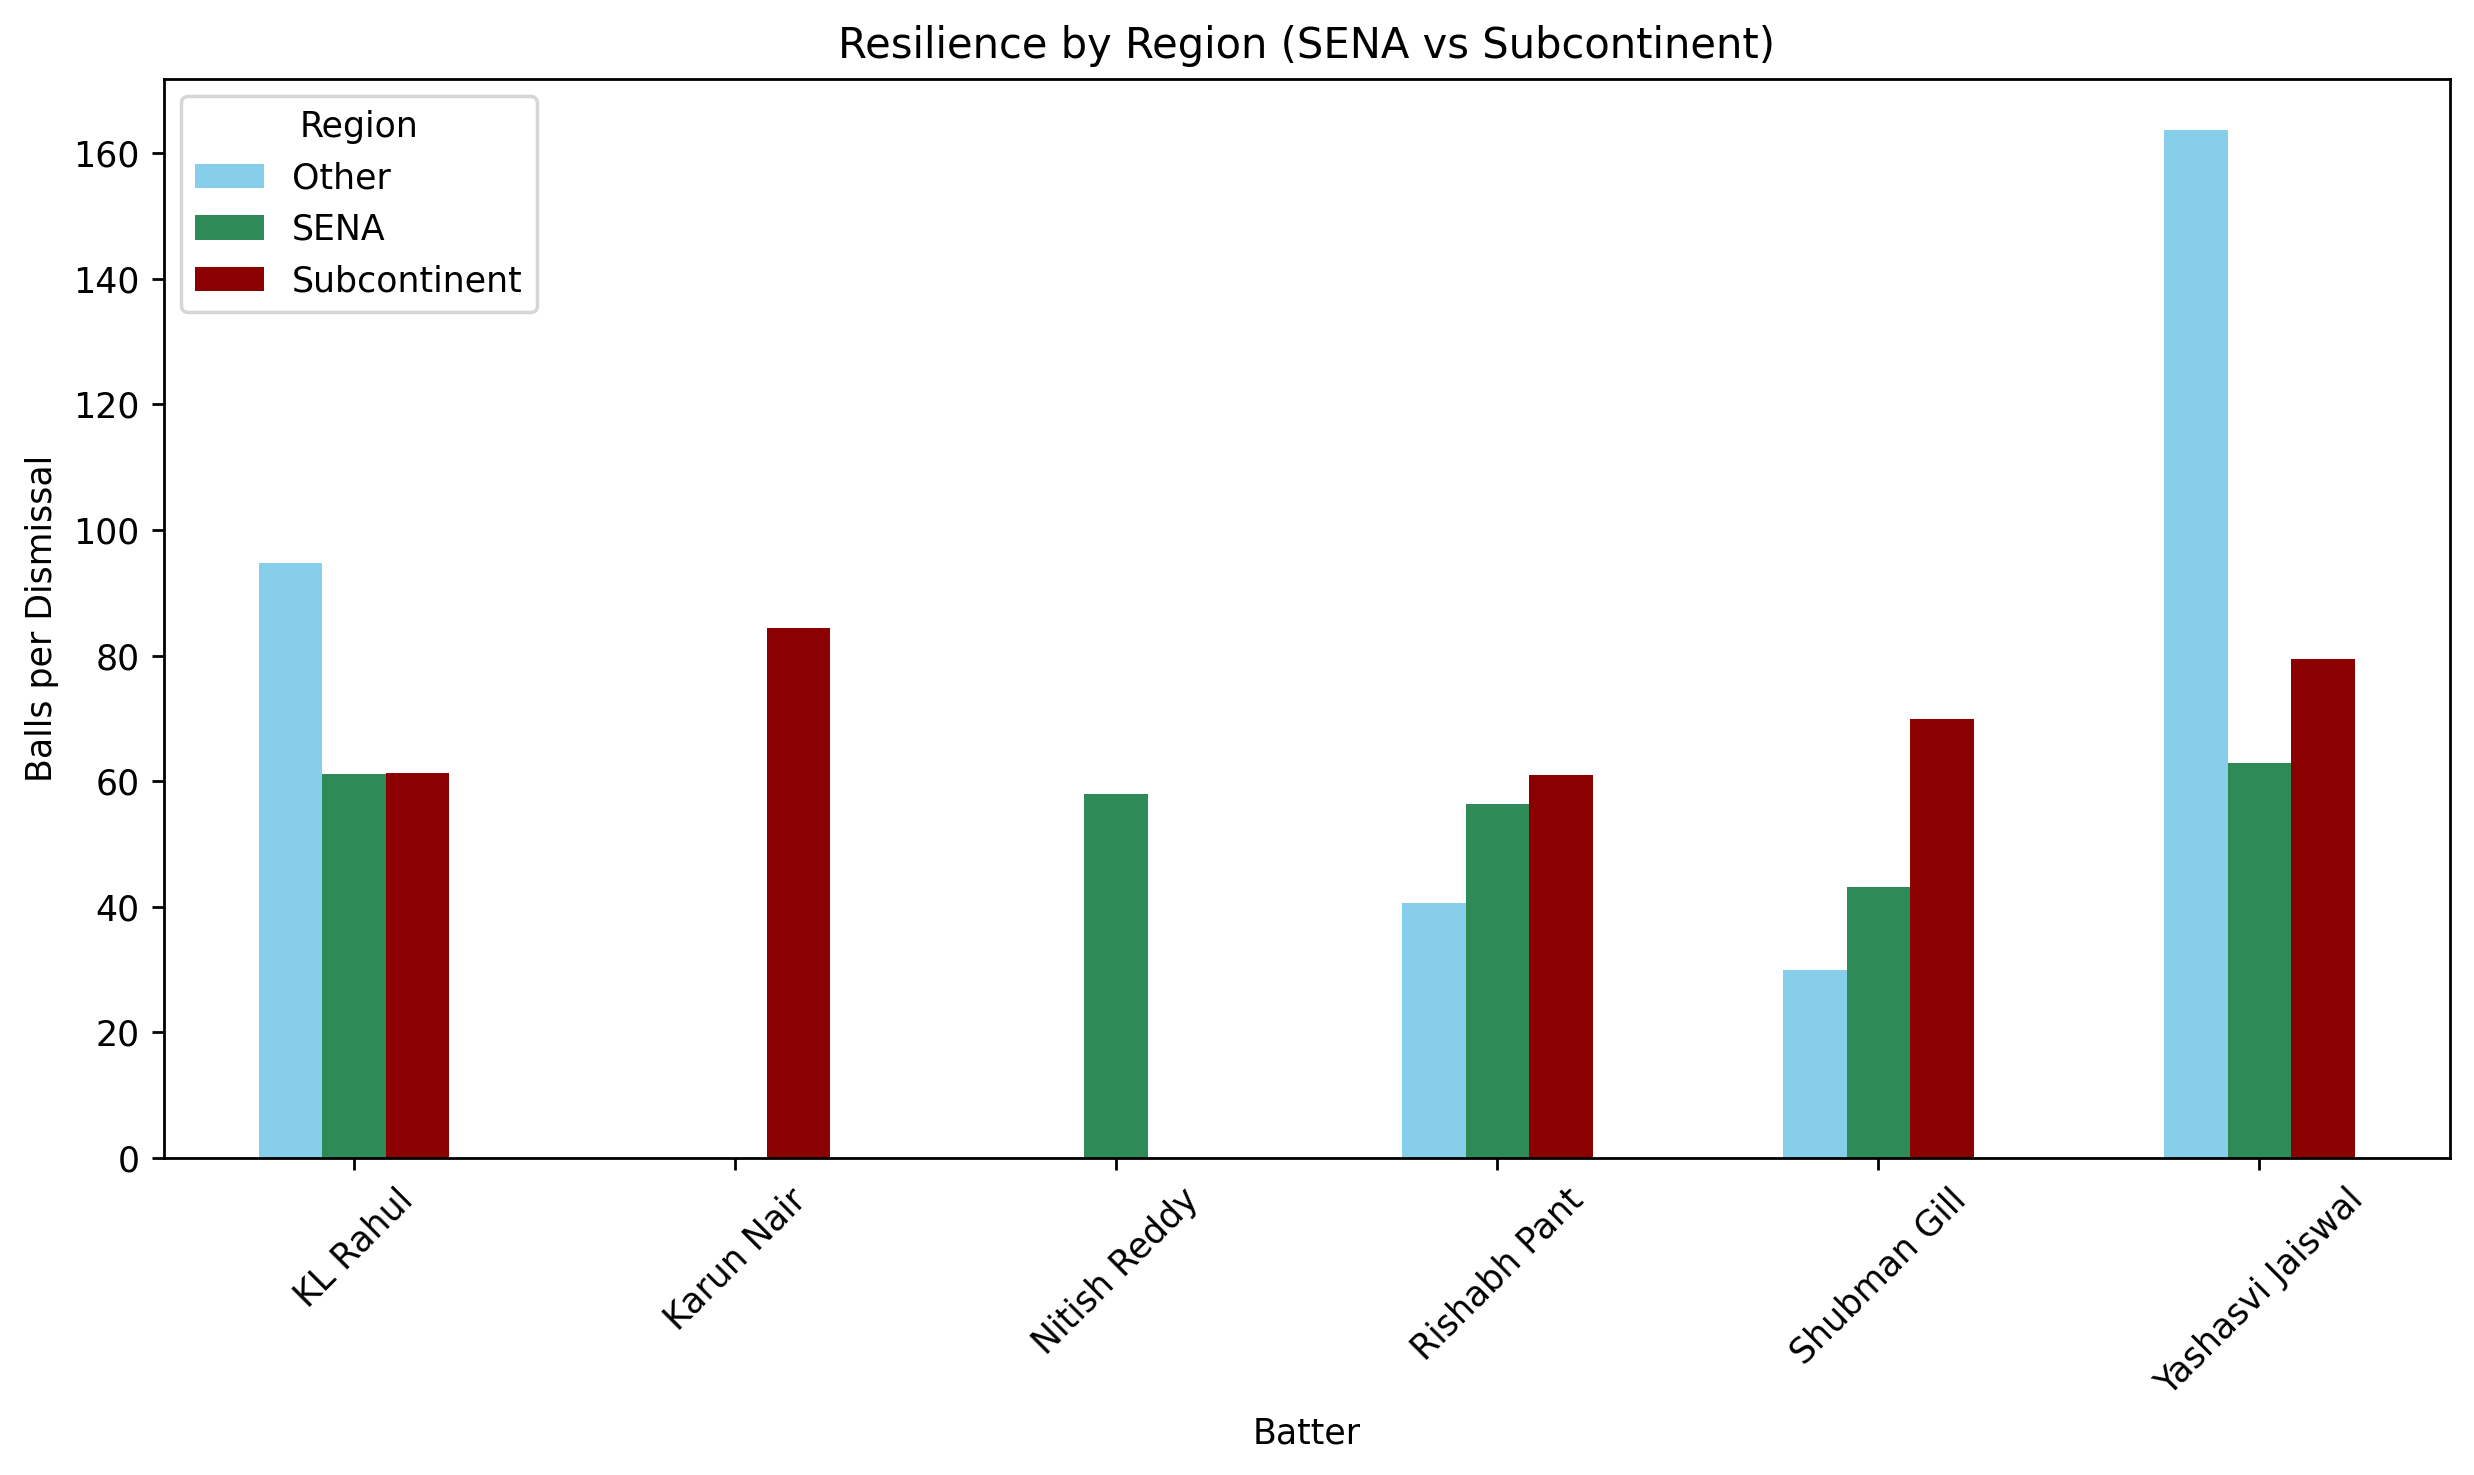

In [323]:
# Bar plot for average in SENA vs Subcontinent
pivot_df_tough = regional_stats.pivot(index = 'Batter', columns = 'Region', values='Balls/Dismissal').fillna(0)

plt.figure(dpi = 250, figsize = (10, 6))
pivot_df_tough.plot(kind = 'bar', color = ['skyblue', 'seagreen', 'darkred'], ax = plt.gca())

plt.title('Resilience by Region (SENA vs Subcontinent)')
plt.xlabel('Batter')
plt.ylabel('Balls per Dismissal')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

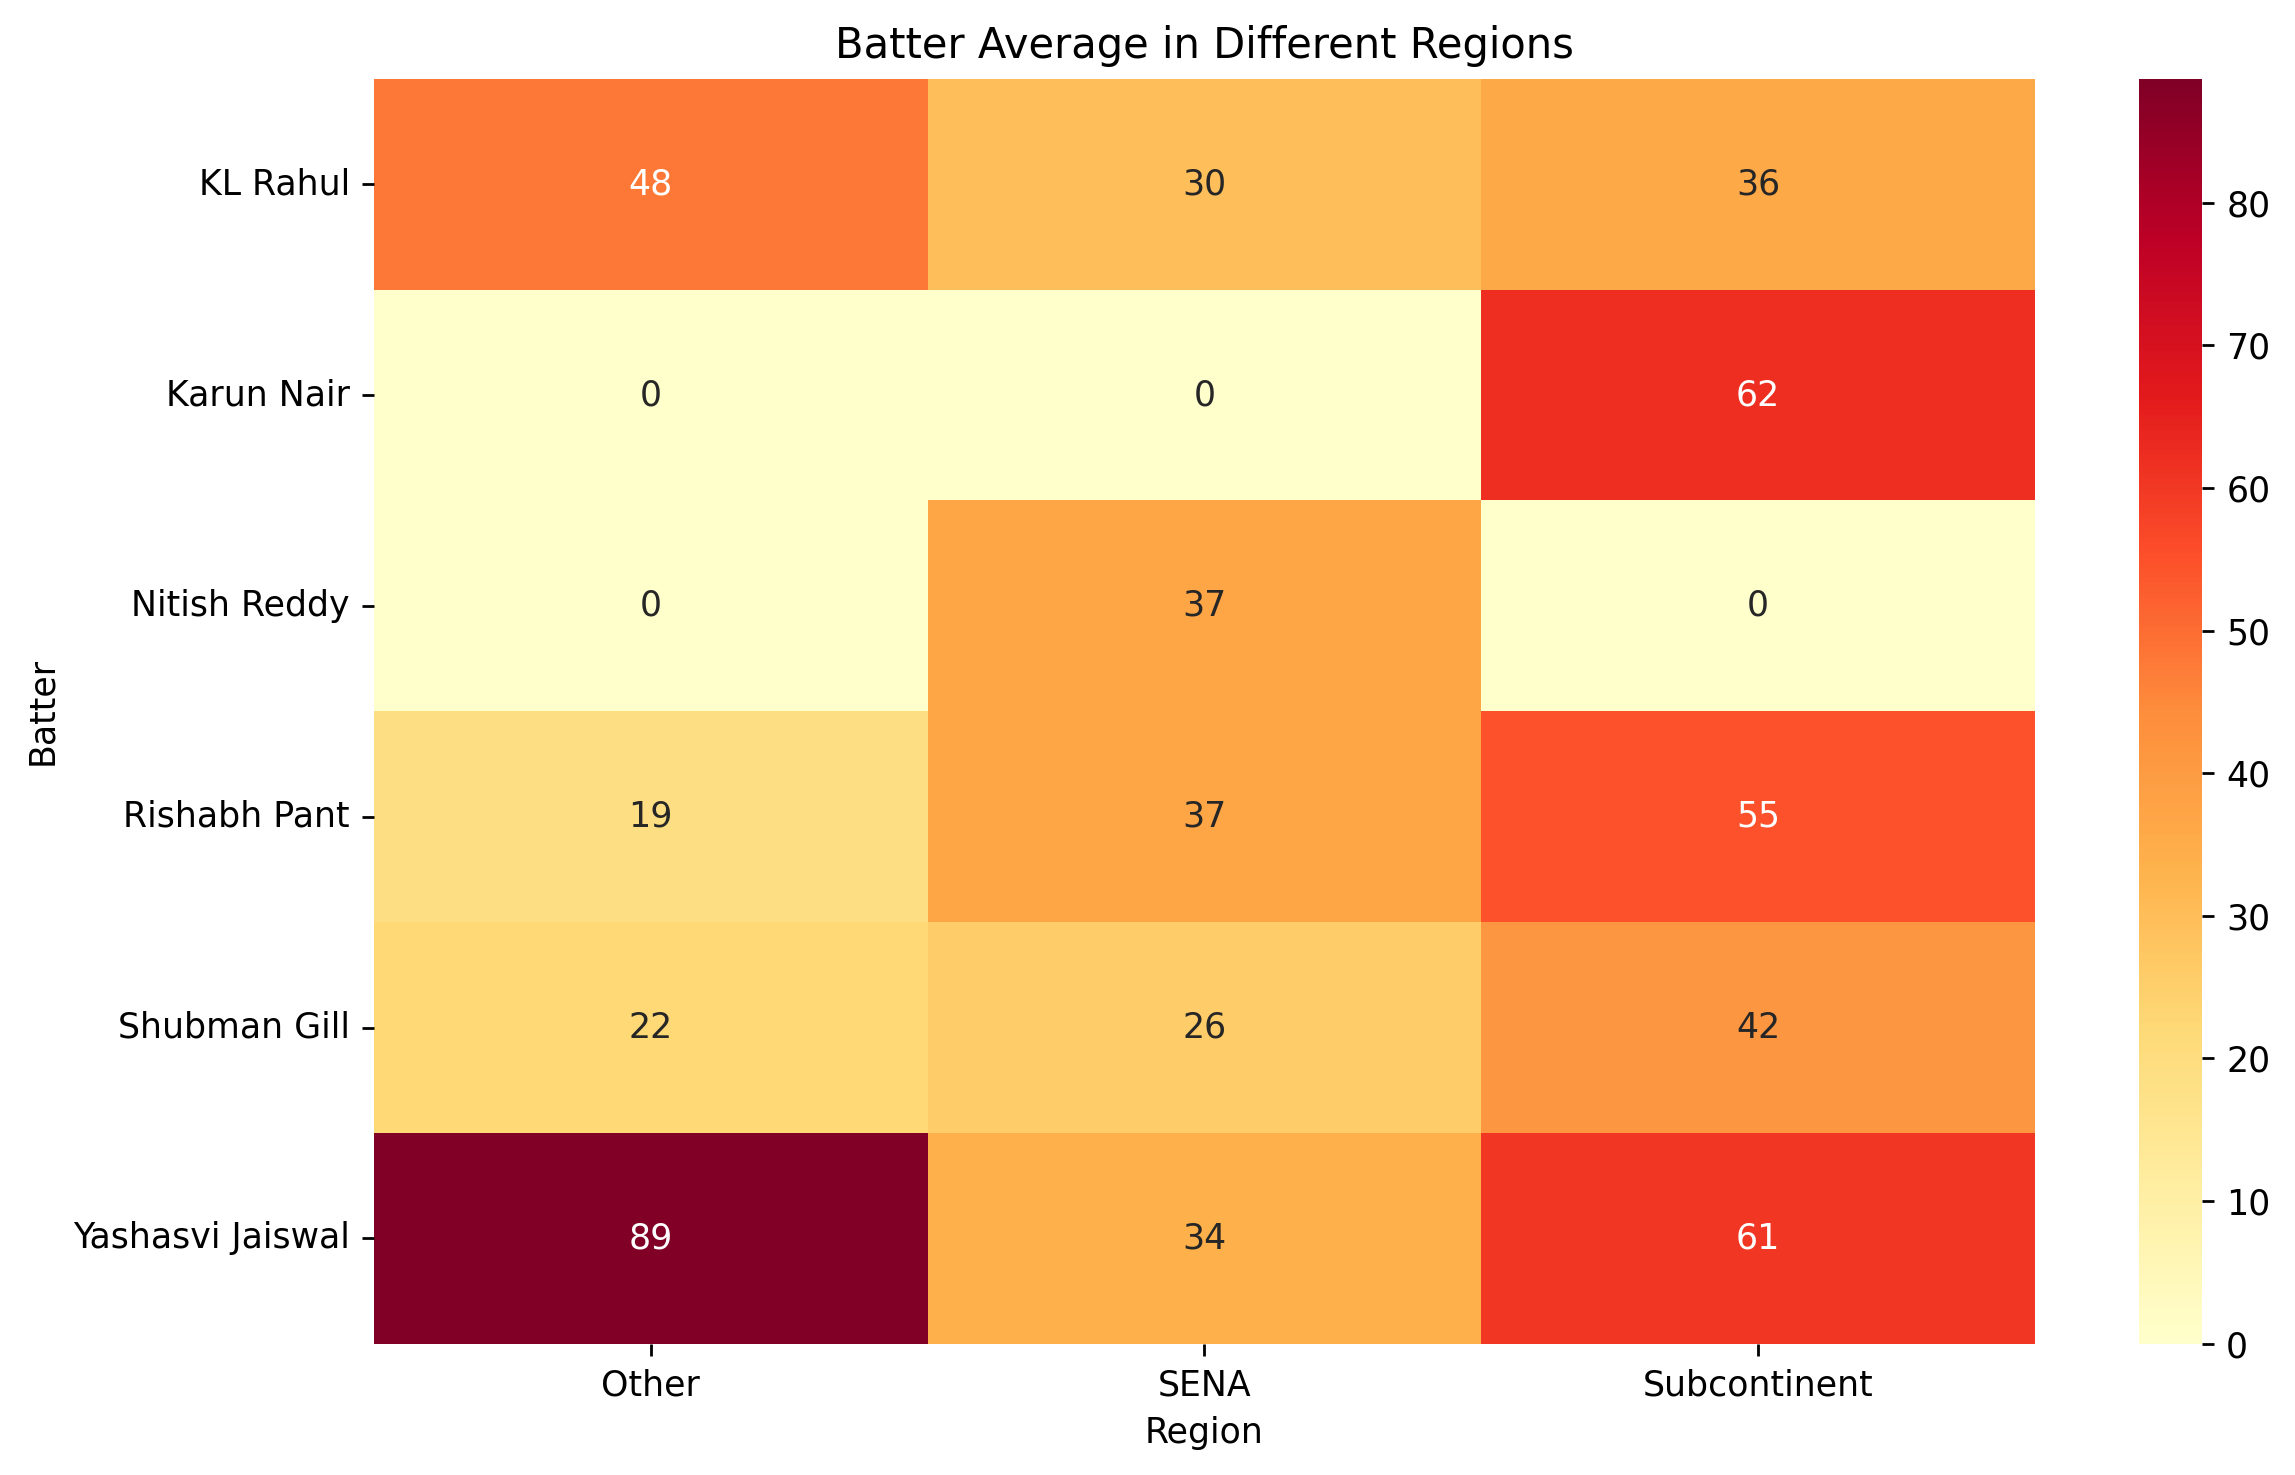

In [324]:
# Heatmap for Average in different regions

heatmap_df = regional_stats.groupby(['Batter', 'Region'])['Avg'].sum().reset_index()

pivot_heatmap = heatmap_df.pivot(index = 'Batter', columns = 'Region', values = 'Avg').fillna(0)

plt.figure(figsize = (10, 6), dpi = 250)
sns.heatmap(pivot_heatmap, annot = True, fmt = '.0f', cmap = 'YlOrRd')

plt.title('Batter Average in Different Regions')
plt.xlabel('Region')
plt.ylabel('Batter')
plt.tight_layout()
plt.show()

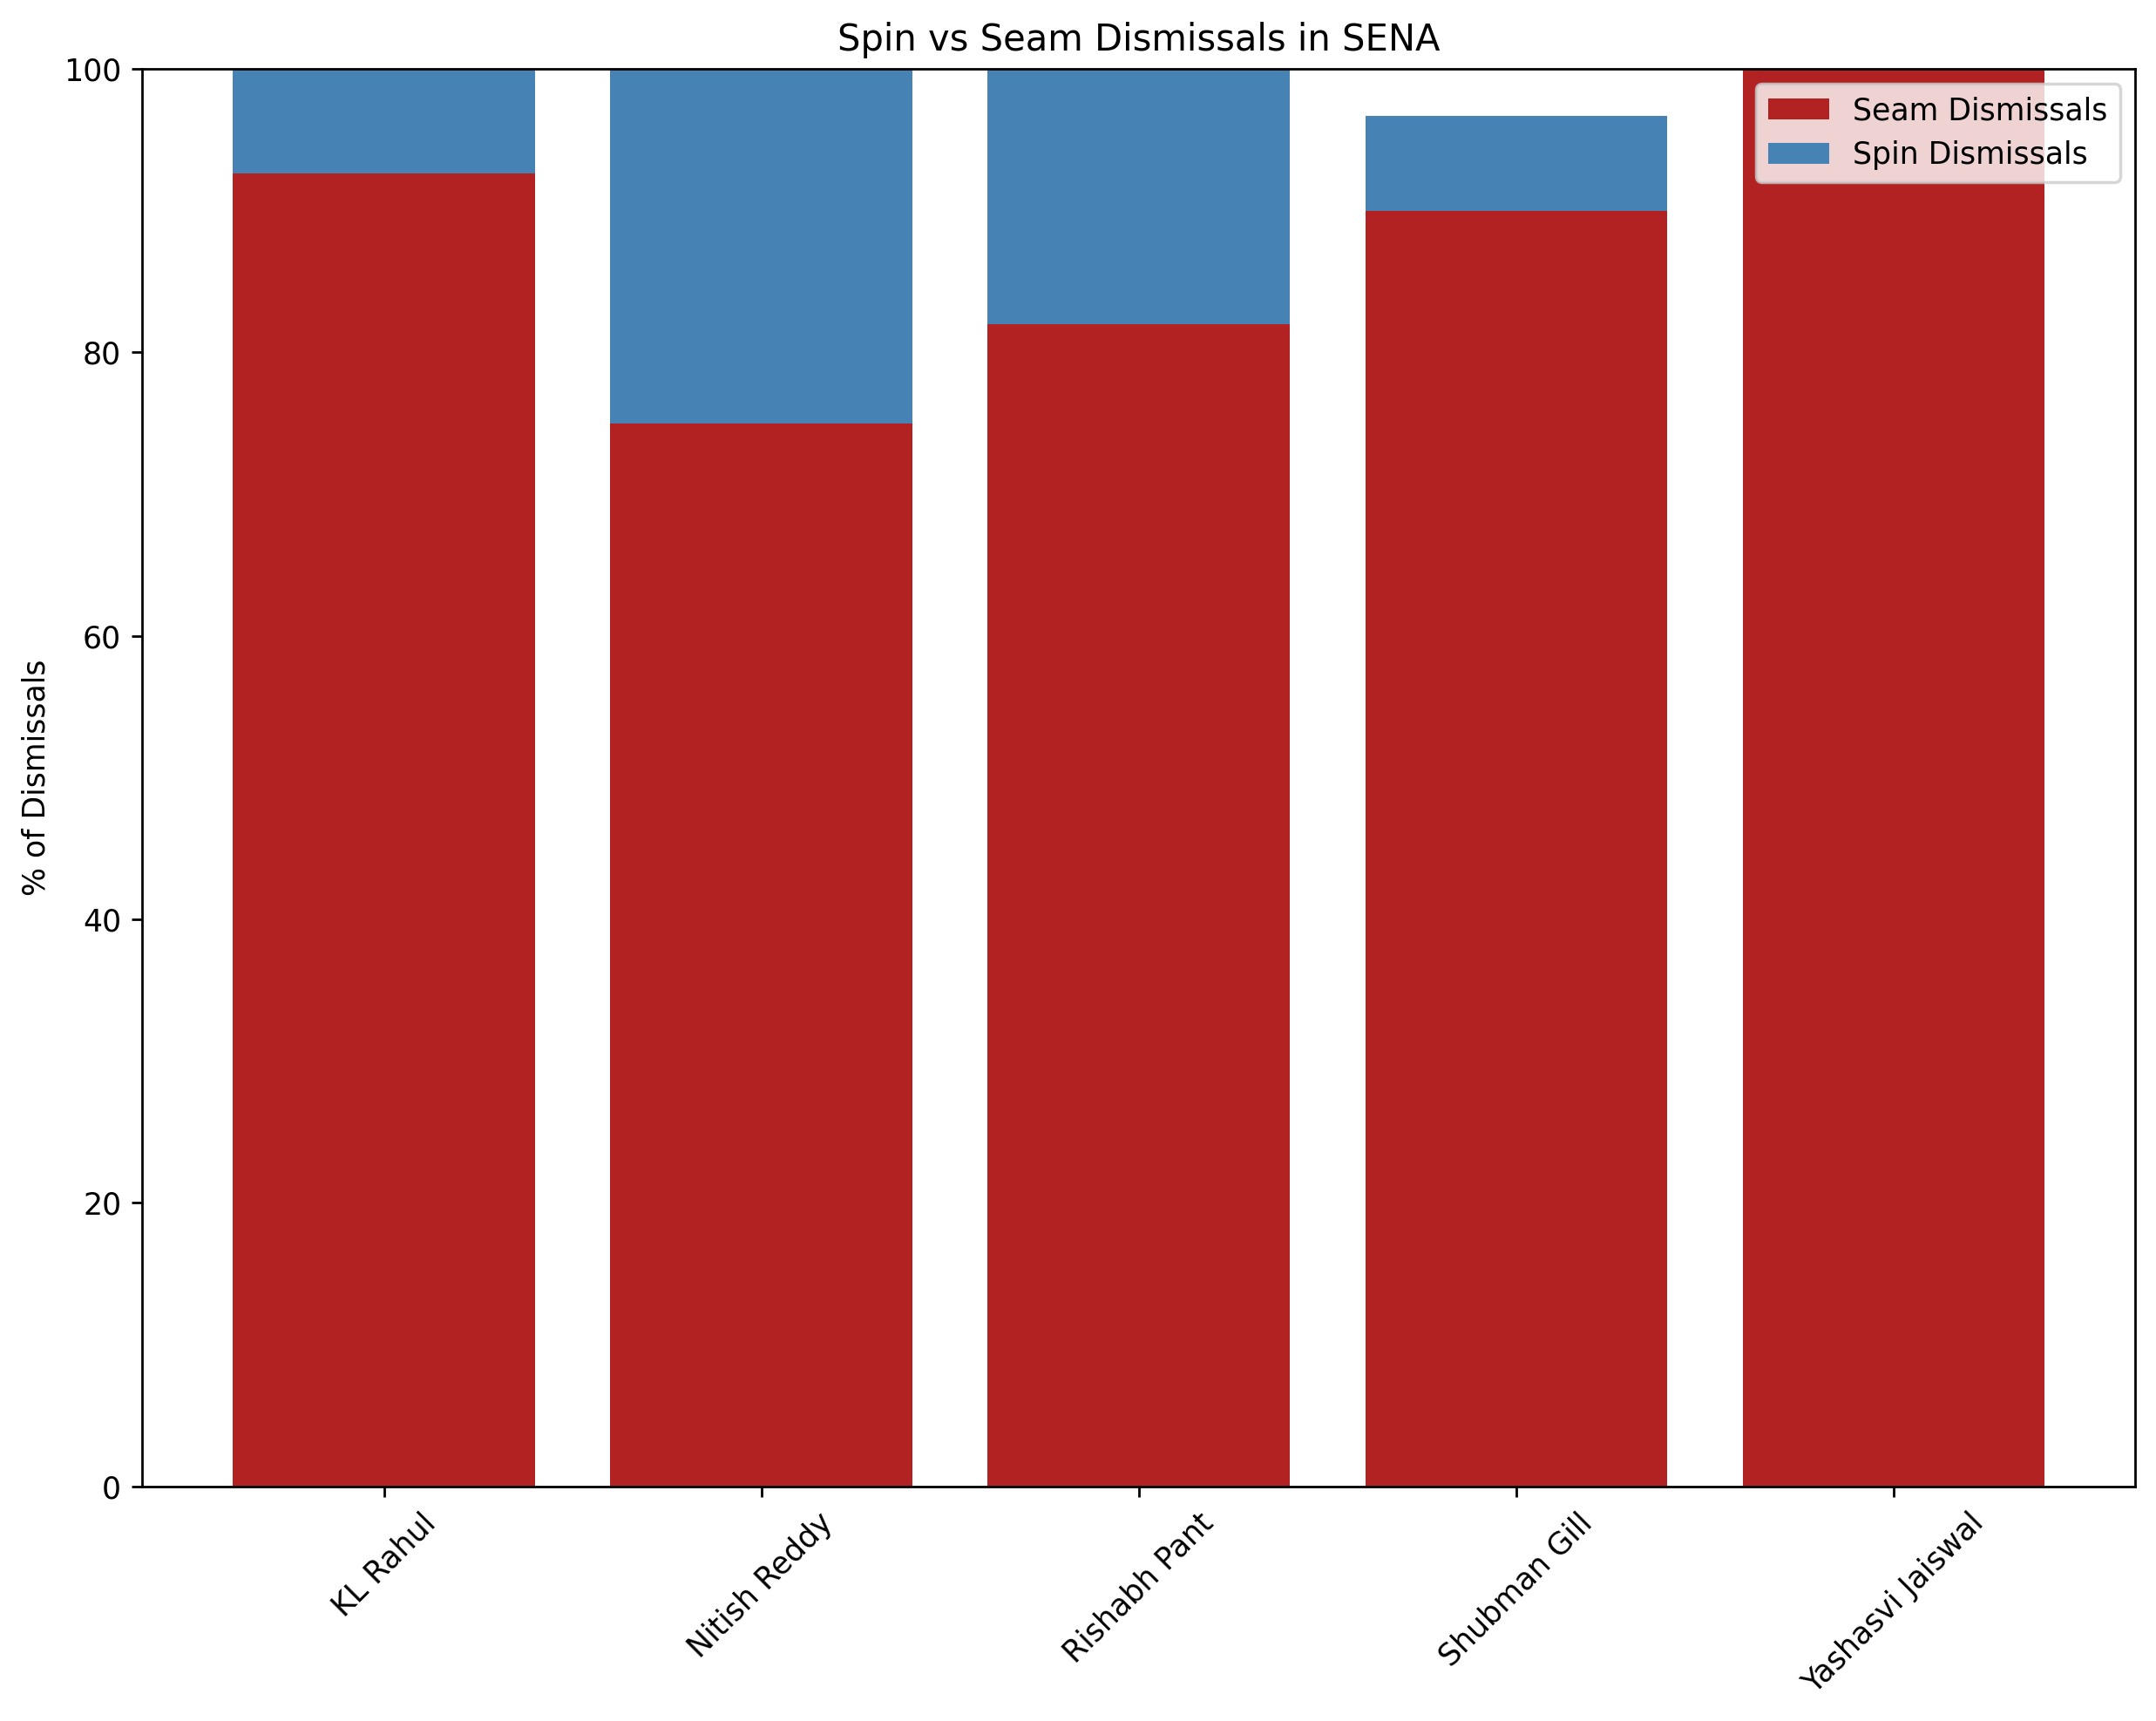

In [325]:
# Stacked Bar Chart to show Dismissal Split % (Spin vs Seam) in SENA countries for each batsman

sena_df = regional_stats[regional_stats['Region'] == 'SENA']

plt.figure(dpi = 250, figsize = (10, 8))
plt.bar(sena_df['Batter'], sena_df['Seam Dismissal %'], label='Seam Dismissals', color='firebrick')
plt.bar(sena_df['Batter'], sena_df['Spin Dismissal %'], bottom=sena_df['Seam Dismissal %'], label='Spin Dismissals', color='steelblue')

plt.ylabel('% of Dismissals')
plt.title('Spin vs Seam Dismissals in SENA')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

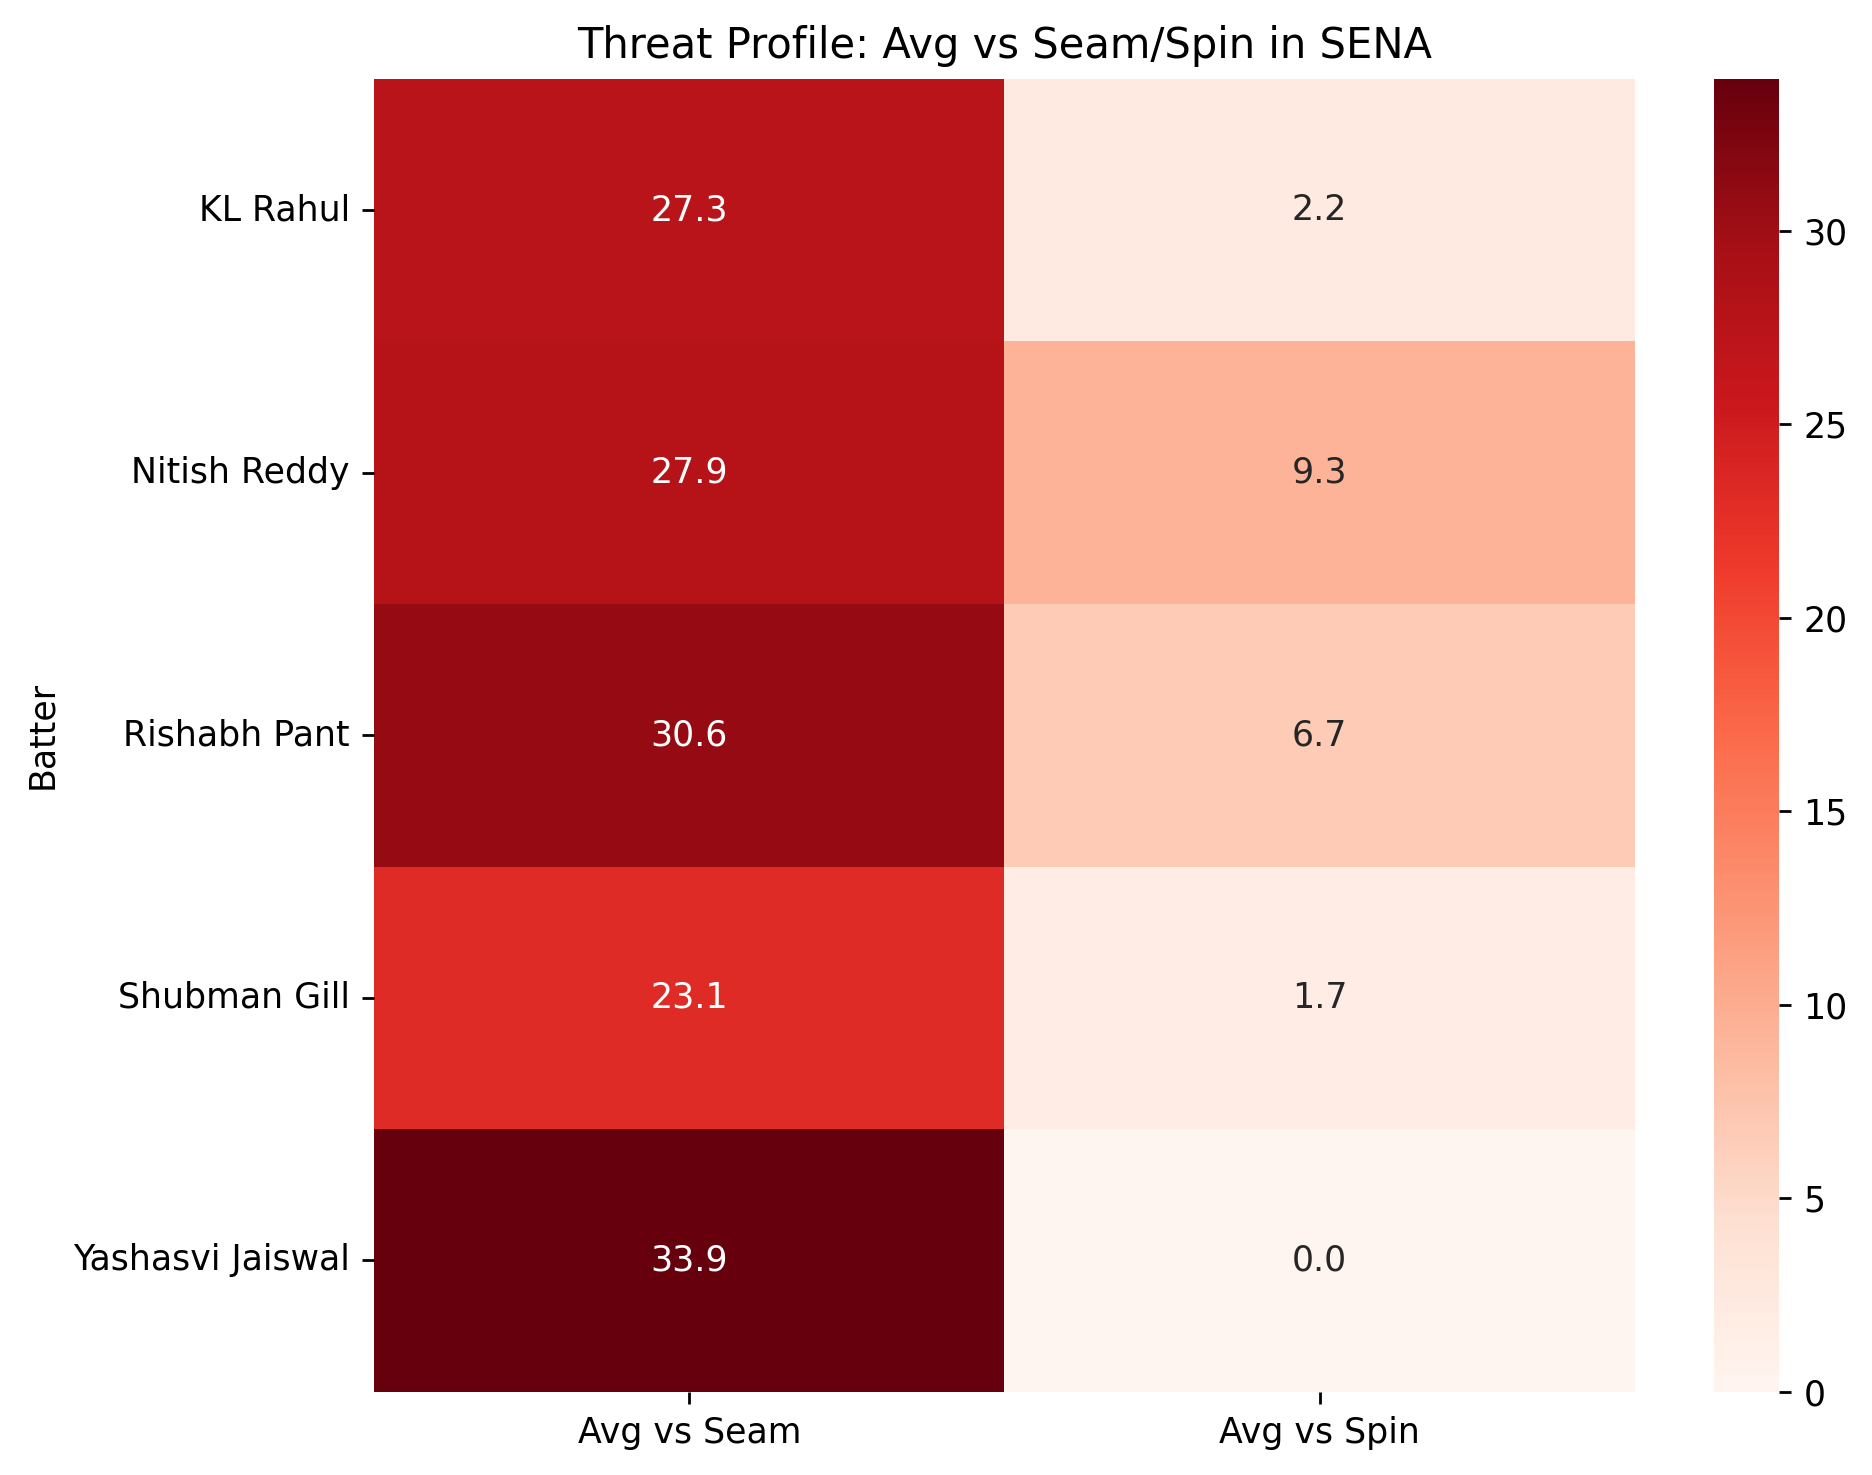

In [326]:
heatmap_df = sena_df[['Batter', 'Avg', 'Seam Dismissal %', 'Spin Dismissal %']].copy()
heatmap_df.set_index('Batter', inplace = True)
heatmap_df['Avg vs Seam'] = heatmap_df['Avg'] * (heatmap_df['Seam Dismissal %'] / 100)
heatmap_df['Avg vs Spin'] = heatmap_df['Avg'] * (heatmap_df['Spin Dismissal %'] / 100)

final = heatmap_df[['Avg vs Seam', 'Avg vs Spin']]

plt.figure(dpi = 250, figsize = (8, 6))
sns.heatmap(final, annot = True, cmap = 'Reds', fmt= ".1f")
plt.title('Threat Profile: Avg vs Seam/Spin in SENA')
plt.tight_layout()
plt.show()

**Monte Carlo Simulation**

*Projecting Expected Batting Output for India's Core Batters in England*

To estimate how India’s frontline batters might perform in the upcoming Test series in England, I employed a Monte Carlo simulation framework grounded in each player's historical performance in SENA conditions (South Africa, England, New Zealand, Australia). This approach allowed me to model the inherent uncertainty in Test match batting while incorporating contextual threats like seam-friendly conditions.

**Modelling Framework**

Each batter’s innings is modeled using two core parameters:

1. *Balls Faced per Dismissal* – a proxy for their resilience and ability to stay on crease.

2. *Strike Rate* – indicating their scoring efficiency.

I simulated 1,000 innings for each batter to generate a probability distribution of expected scores.

**Key Assumptions**

*Balls Faced* is simulated using a log-normal distribution, which better reflects Test cricket dynamics: short innings are common, but longer ones, while rarer, are possible. The distribution is calibrated to each batter’s historical average and a custom standard deviation derived from a Volatility Index (VI), calculated from their real-world innings.

*Strike Rate* is drawn from a normal distribution, centered around the batter’s SENA strike rate, and clipped within realistic Test match bounds (e.g., 30–120) to maintain plausibility.

We compute the expected score as:

**Score = (Balls Faced × Strike Rate) / 100**

_____________________________________________________________________________

**Seam Threat Index: Adjusting for England’s Bowling Attack**

Since England are expected to field a pace-heavy attack (Woakes, Carse, Tongue, etc.), aand the historical trend of Indian batters being disproportionately dismissed by seam in SENA conditions, we introduce a Seam Threat Index (STI) to penalize expected scores where warranted.

This index applies a contextual downward adjustment to each batter's strike rate based on their individual performance against pace (dimissal rate, average against seam)
For instance, a batter with a 90% seam dismissal rate might get a penalty weight of 5% on their strike rate, and a batter with 100% seam dismissal rate might get a 10% penalty.

**Adjusted Strike Rate = Mean Strike Rate × [1− (Penalty Weight)]**


This models the idea that a batter likely to face a dominant pace attack, and with a track record of struggling against seam, should have a lower expected strike rate (and output), and that simulation outputs aren't just reflective of raw historical averages but also account for tactical vulnerabilities in England’s specific bowling environment, which is well-known to support seamers.

In [327]:
# Creating a volatility index to empirically determine standard deviation for balls faced for each batter
volatility_df = combined_df.groupby('Batter')['BF'].std().reset_index()
volatility_df.columns = ['Batter', 'VolatilityIndex']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
volatility_df['NormalizedVI'] = scaler.fit_transform(volatility_df[['VolatilityIndex']])
volatility_df

,Batter,VolatilityIndex,NormalizedVI
0,KL Rahul,562.085826,0.197368
1,Karun Nair,NaN,NaN
2,Nitish Reddy,NaN,NaN
3,Rishabh Pant,520.330344,0.000000
4,Shubman Gill,731.892273,1.000000
5,Yashasvi Jaiswal,564.171664,0.207227


In [328]:
# Filter Gill's data in SENA
gill_sena = regional_stats[(regional_stats['Batter'] == 'Shubman Gill') & (regional_stats['Region'] == 'SENA')]

# Calculate mean balls faced and mean strike rate
mean_balls_gill = (gill_sena['BF'].values[0]/(gill_sena['Inns'].values[0] - gill_sena['Not Out'].values[0])).round(2)
mean_sr_gill = ((gill_sena['Runs'].values[0] / gill_sena['BF'].values[0]) * 100).round(2)

In [329]:
# Inputs for the Simulation
# Mean Balls Faced: 43.15
# Standard Deviation of Balls Faced: 25 (a reasonable assumption to allow variability across innings).
# Mean Strike Rate: 59.56
# Standard Deviation of Strike Rate: 5 (a conservative spread to allow match-to-match fluctuation)

std_balls_gill = 25
variance_gill = std_balls_gill ** 2
mu_ln_gill = np.log(mean_balls_gill ** 2 / np.sqrt(variance_gill + mean_balls_gill ** 2))
sigma_ln_gill = np.sqrt(np.log(1 + (variance_gill / mean_balls_gill ** 2)))

In [330]:
# Simulating Balls Faced and SR

np.random.seed(14)

# Simulating 1000 innings
n_simulations = 1000

# Simulating balls faced
balls_faced_gill = np.random.lognormal(mean = mu_ln_gill , sigma = sigma_ln_gill, size = n_simulations)
balls_faced_gill = np.clip(balls_faced_gill, 1, 300).round()  # Min 1 ball faced

# Simulating strike rates
strike_rates_gill = np.random.normal(loc = 59.56, scale = 5, size = n_simulations)
strike_rates_gill = np.clip(strike_rates_gill, 30, 120)  # Keeping SRs within cricket realism

In [331]:
# Seam Threat Index adjustment: England expected to use a heavy seam attack (e.g. Woakes, Carse, Tongue, Stokes)
# So, we're reducing Gill's strike rate by 5% as a conservative penalty
adjusted_sr_gill = mean_sr_gill * 0.95  # 5% penalty due to seam-dominant conditions

# Simulating 1000 innings
runs_gill = (balls_faced_gill * adjusted_sr_gill) / 100

In [332]:
mean_score_gill = np.mean(runs_gill)
median_score_gill = np.median(runs_gill)
percentile_25_gill = np.percentile(runs_gill, 25)
percentile_75_gill = np.percentile(runs_gill, 75)

# Probabilities
prob_50_plus_gill = np.mean(runs_gill >= 50) * 100
prob_100_plus_gill = np.mean(runs_gill >= 100) * 100

print(f"Expected Score (Mean): {mean_score_gill:.2f}")
print(f"Median Score: {median_score_gill:.2f}")
print(f"IQR: {percentile_25_gill:.2f} – {percentile_75_gill:.2f}")
print(f"Chance of scoring 50+: {prob_50_plus_gill:.1f}%")
print(f"Chance of scoring 100+: {prob_100_plus_gill:.1f}%")

Expected Score (Mean): 23.42
Median Score: 20.37
IQR: 14.15 – 28.86
Chance of scoring 50+: 5.0%
Chance of scoring 100+: 0.1%


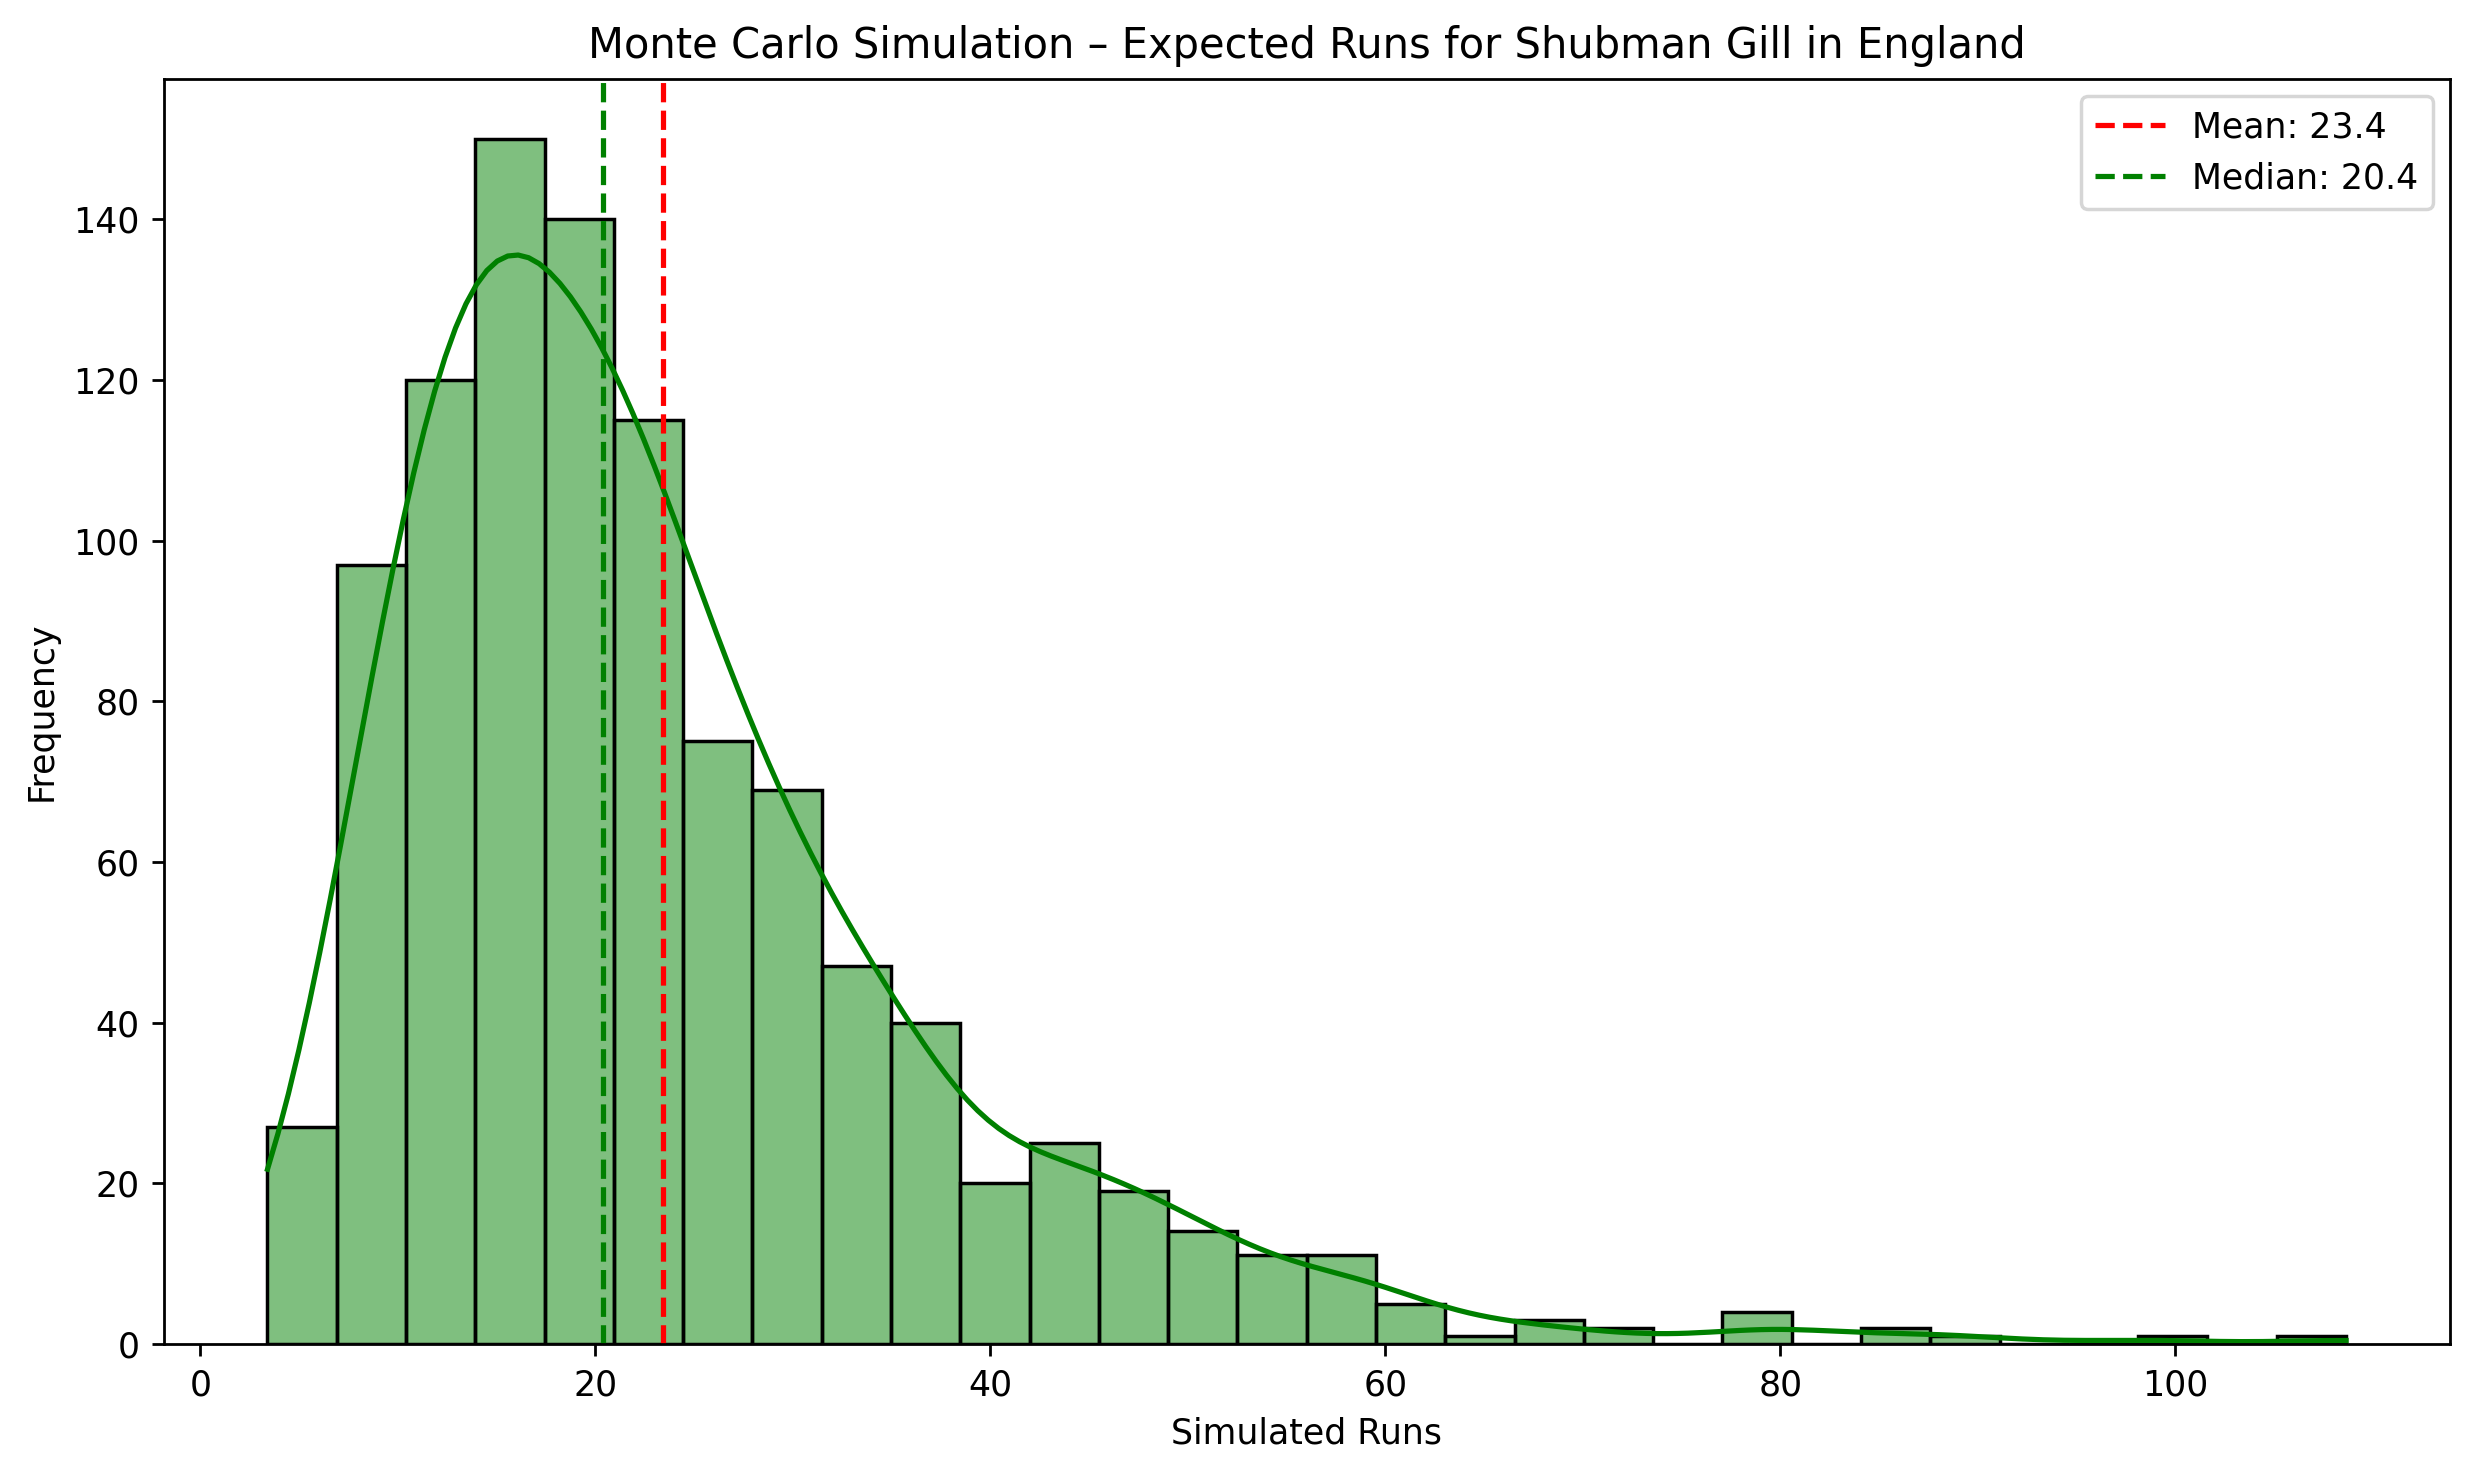

In [333]:
# Plotting
plt.figure(figsize=(10, 6), dpi = 250)
sns.histplot(runs_gill, bins = 30, kde = True, color = 'green', edgecolor = 'black')

plt.axvline(mean_score_gill, color = 'red', linestyle = '--', label = f'Mean: {mean_score_gill:.1f}')
plt.axvline(median_score_gill, color = 'green', linestyle = '--', label = f'Median: {median_score_gill:.1f}')
plt.title('Monte Carlo Simulation – Expected Runs for Shubman Gill in England')
plt.xlabel('Simulated Runs')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

In [334]:
# Similarly, we simulate 1000 innings for other batsmen as well

# Filter Jaiswal's data in SENA
jaiswal_sena = regional_stats[(regional_stats['Batter'] == 'Yashasvi Jaiswal') & (regional_stats['Region'] == 'SENA')]

# Calculate mean balls faced and mean strike rate
mean_balls_jaiswal = (jaiswal_sena['BF'].values[0]/(jaiswal_sena['Inns'].values[0] - jaiswal_sena['Not Out'].values[0])).round(2)
mean_sr_jaiswal = ((jaiswal_sena['Runs'].values[0] / jaiswal_sena['BF'].values[0]) * 100).round(2)

In [335]:
# Inputs for the Simulation
# Mean Balls Faced: 62.85
# Standard Deviation of Balls Faced: 13 (a reasonable assumption to allow variability across innings).
# Mean Strike Rate: 53.98
# Standard Deviation of Strike Rate: 5 (a conservative spread to allow match-to-match fluctuation)

std_balls_jaiswal = 15
variance_jaiswal = std_balls_jaiswal ** 2
mu_ln_jaiswal = np.log(mean_balls_jaiswal ** 2 / np.sqrt(variance_jaiswal + mean_balls_jaiswal ** 2))
sigma_ln_jaiswal = np.sqrt(np.log(1 + (variance_jaiswal / mean_balls_jaiswal ** 2)))

In [336]:
# Simulating Balls Faced and SR

np.random.seed(14)

# Simulating 1000 innings
n_simulations = 1000

# Simulating balls faced
balls_faced_jaiswal = np.random.lognormal(mean = mu_ln_jaiswal , sigma = sigma_ln_jaiswal, size = n_simulations)
balls_faced_jaiswal = np.clip(balls_faced_jaiswal, 1, 300).round()  # Min 1 ball faced

# Simulating strike rates
strike_rates_jaiswal = np.random.normal(loc = 53.98, scale = 5, size = n_simulations)
strike_rates_jaiswal = np.clip(strike_rates_jaiswal, 30, 120)  # Keeping SRs within cricket realism

In [337]:
# Seam Threat Index adjustment: England expected to use a heavy seam attack (e.g. Woakes, Carse, Tongue, Stokes)
# So, we're reducing Jaiswal's strike rate by 10% as a penalty
adjusted_sr_jaiswal = mean_sr_jaiswal * 0.90  # 10% penalty due to seam-dominant conditions (100% of his dismissals have come against pace in SENA)

# Simulating 1000 innings
runs_jaiswal = (balls_faced_jaiswal * adjusted_sr_jaiswal) / 100

In [338]:
mean_score_jaiswal = np.mean(runs_jaiswal)
median_score_jaiswal = np.median(runs_jaiswal)
percentile_25_jaiswal = np.percentile(runs_jaiswal, 25)
percentile_75_jaiswal = np.percentile(runs_jaiswal, 75)

# Probabilities
prob_50_plus_jaiswal = np.mean(runs_jaiswal >= 50) * 100
prob_100_plus_jaiswal = np.mean(runs_jaiswal >= 100) * 100

print(f"Expected Score (Mean): {mean_score_jaiswal:.2f}")
print(f"Median Score: {median_score_jaiswal:.2f}")
print(f"IQR: {percentile_25_jaiswal:.2f} – {percentile_75_jaiswal:.2f}")
print(f"Chance of scoring 50+: {prob_50_plus_jaiswal:.1f}%")
print(f"Chance of scoring 100+: {prob_100_plus_jaiswal:.1f}%")

Expected Score (Mean): 29.94
Median Score: 29.15
IQR: 24.78 – 34.01
Chance of scoring 50+: 1.1%
Chance of scoring 100+: 0.0%


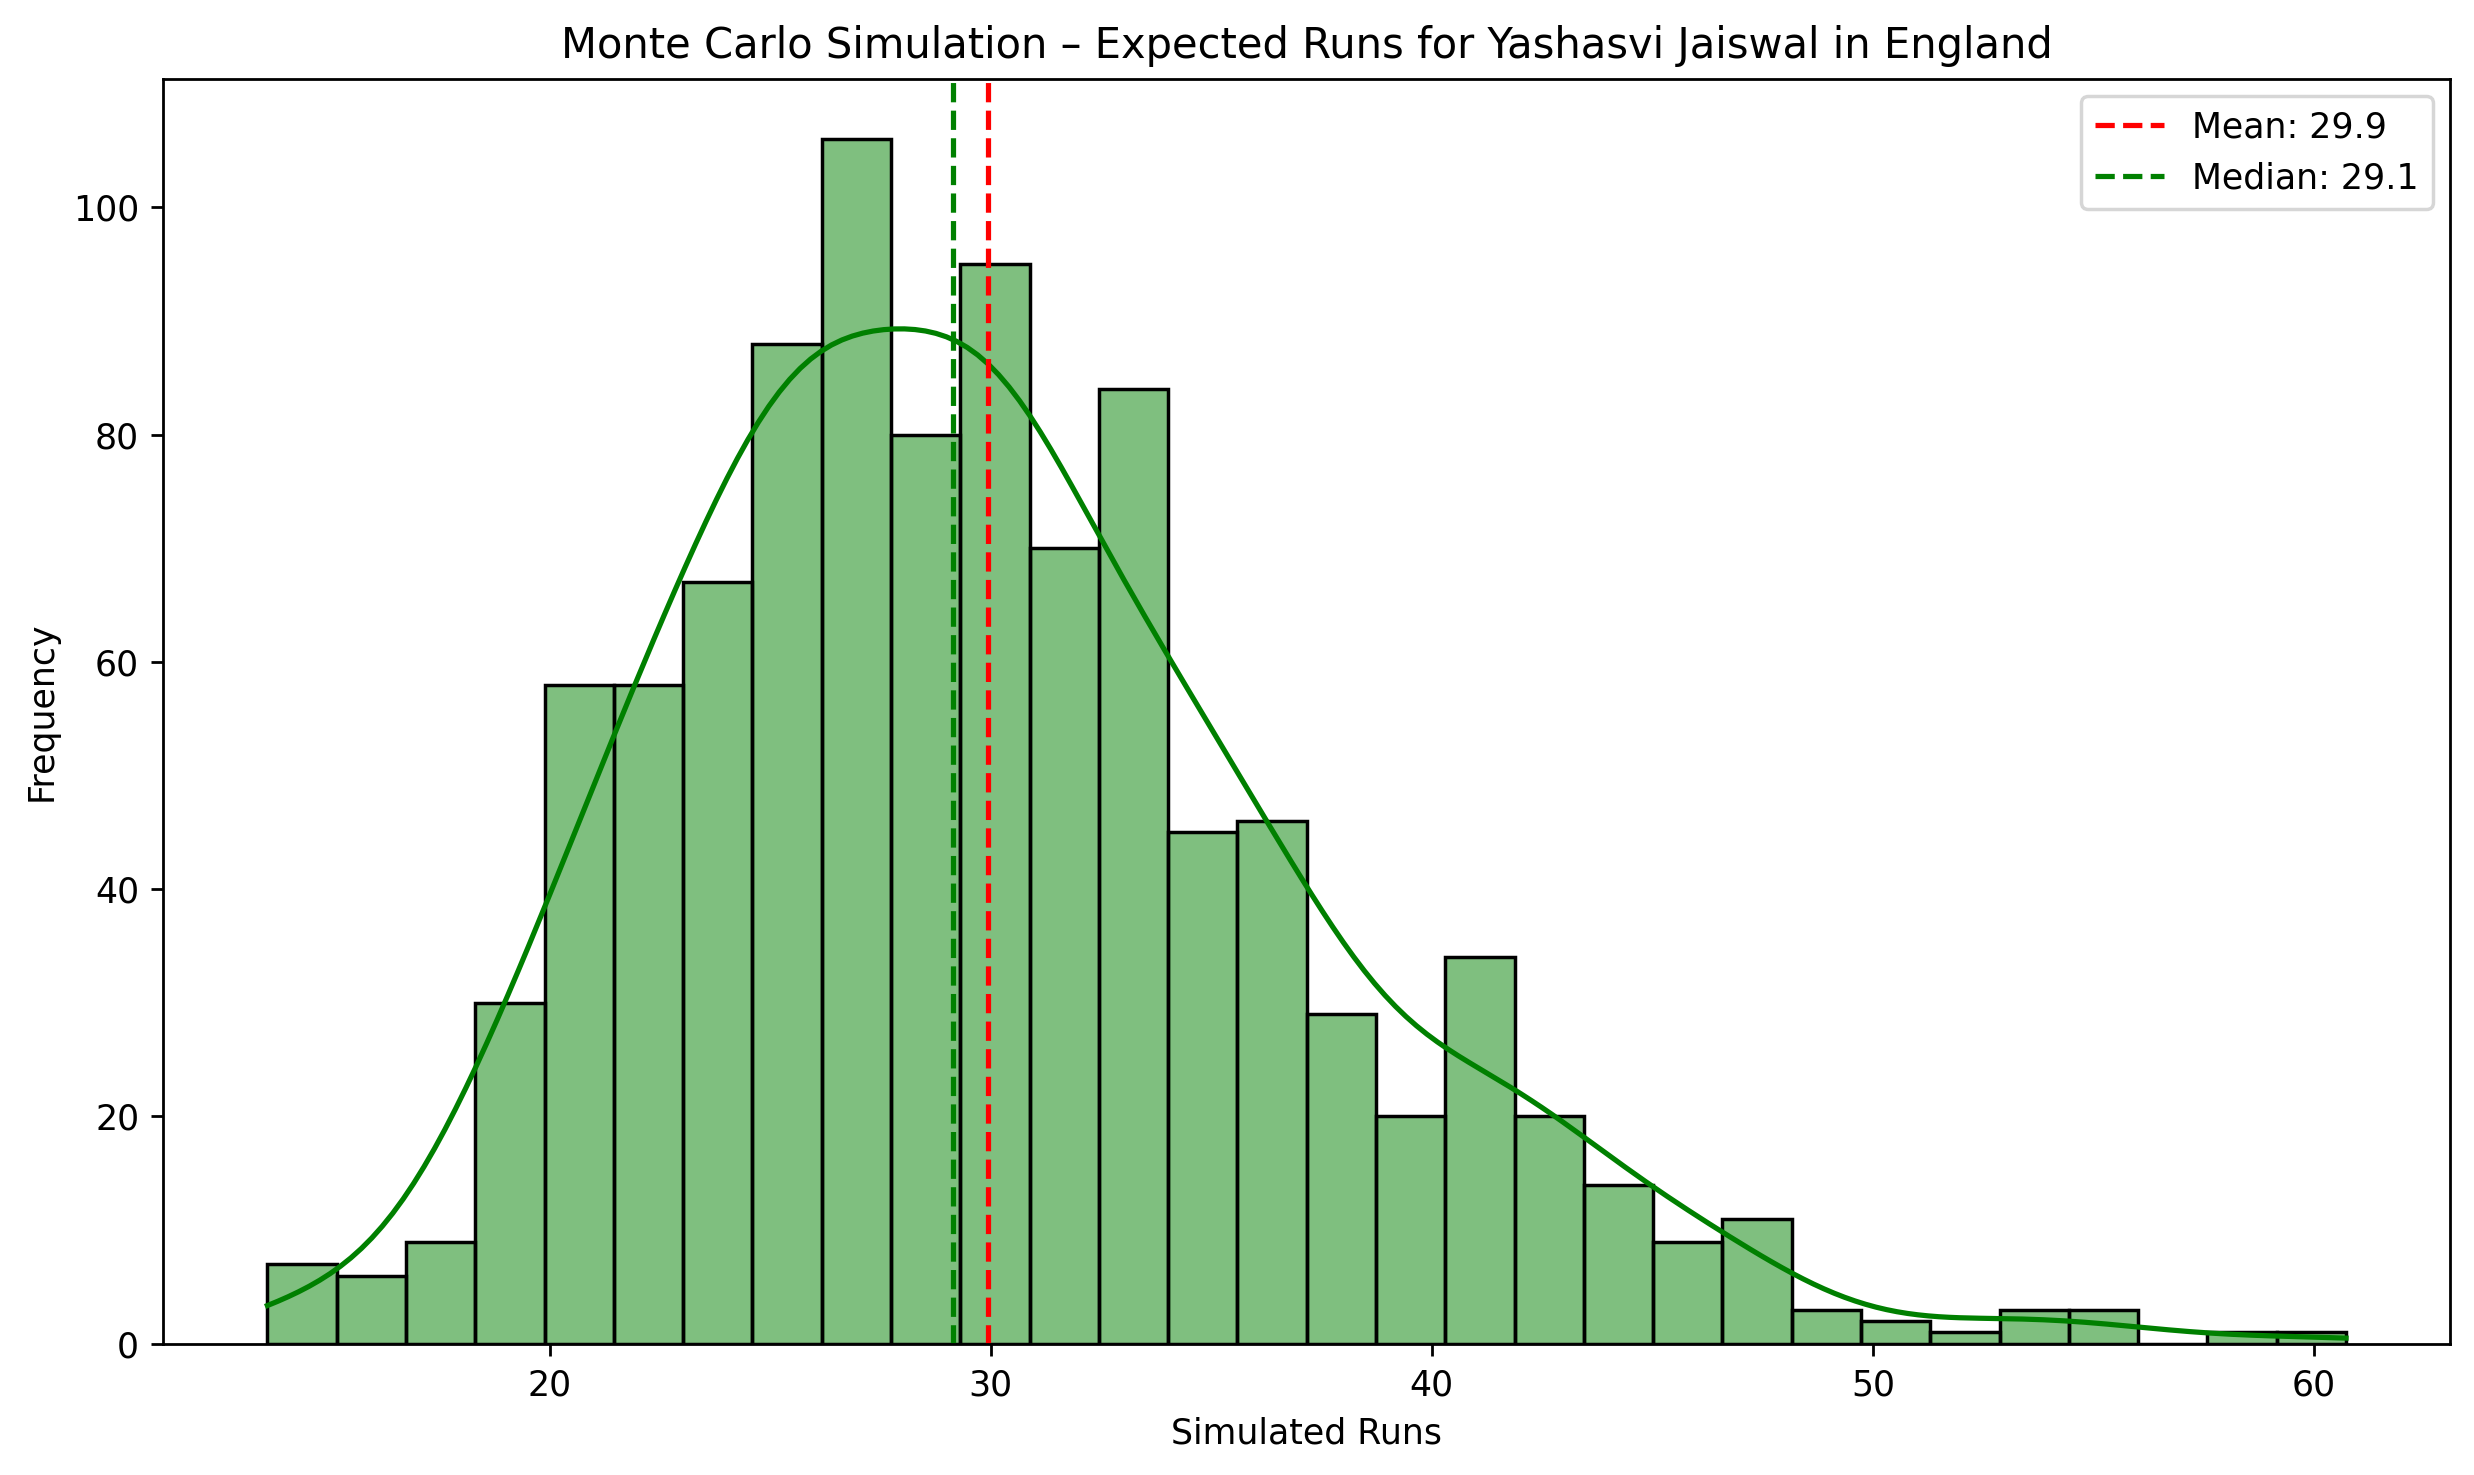

In [339]:
# Plotting
plt.figure(figsize=(10, 6), dpi = 250)
sns.histplot(runs_jaiswal, bins = 30, kde = True, color = 'green', edgecolor = 'black')

plt.axvline(mean_score_jaiswal, color = 'red', linestyle = '--', label = f"Mean: {mean_score_jaiswal:.1f}")
plt.axvline(median_score_jaiswal, color = 'green', linestyle = '--', label = f"Median: {median_score_jaiswal:.1f}")
plt.title("Monte Carlo Simulation – Expected Runs for Yashasvi Jaiswal in England")
plt.xlabel("Simulated Runs")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

In [340]:
#Rishabh Pant

# Filter Pant's data in SENA
pant_sena = regional_stats[(regional_stats['Batter'] == 'Rishabh Pant') & (regional_stats['Region'] == 'SENA')]

# Calculate mean balls faced and mean strike rate
mean_balls_pant = (pant_sena['BF'].values[0]/(pant_sena['Inns'].values[0] - pant_sena['Not Out'].values[0])).round(2)
mean_sr_pant = ((pant_sena['Runs'].values[0] / pant_sena['BF'].values[0]) * 100).round(2)

In [341]:
# Inputs for the Simulation
# Mean Balls Faced: 56.42
# Standard Deviation of Balls Faced: 10 (a reasonable assumption to allow variability across innings).
# Mean Strike Rate: 66.21
# Standard Deviation of Strike Rate: 5 (a conservative spread to allow match-to-match fluctuation)

std_balls_pant = 10
variance_pant = std_balls_pant ** 2
mu_ln_pant = np.log(mean_balls_pant ** 2 / np.sqrt(variance_pant + mean_balls_pant ** 2))
sigma_ln_pant = np.sqrt(np.log(1 + (variance_pant / mean_balls_pant ** 2)))

In [342]:
# Simulating Balls Faced and SR

np.random.seed(14)

# Simulating 1000 innings
n_simulations = 1000

# Simulating balls faced
balls_faced_pant = np.random.lognormal(mean = mu_ln_pant , sigma = sigma_ln_pant, size = n_simulations)
balls_faced_pant = np.clip(balls_faced_pant, 1, 300).round()  # Min 1 ball faced

# Simulating strike rates
strike_rates_pant = np.random.normal(loc = 66.21, scale = 5, size = n_simulations)
strike_rates_pant = np.clip(strike_rates_pant, 30, 120)  # Keeping SRs within cricket realism

In [343]:
# Seam Threat Index adjustment: England expected to use a heavy seam attack (e.g. Woakes, Carse, Tongue, Stokes)
# No penalty for Pant, good record against pace

runs_pant = (balls_faced_pant * mean_sr_pant) / 100

In [344]:
mean_score_pant = np.mean(runs_pant)
median_score_pant = np.median(runs_pant)
percentile_25_pant = np.percentile(runs_pant, 25)
percentile_75_pant = np.percentile(runs_pant, 75)

# Probabilities
prob_50_plus_pant = np.mean(runs_pant >= 50) * 100
prob_100_plus_pant = np.mean(runs_pant >= 100) * 100

print(f"Expected Score (Mean): {mean_score_pant:.2f}")
print(f"Median Score: {median_score_pant:.2f}")
print(f"IQR: {percentile_25_pant:.2f} – {percentile_75_pant:.2f}")
print(f"Chance of scoring 50+: {prob_50_plus_pant:.1f}%")
print(f"Chance of scoring 100+: {prob_100_plus_pant:.1f}%")

Expected Score (Mean): 36.82
Median Score: 36.42
IQR: 32.28 – 41.05
Chance of scoring 50+: 3.6%
Chance of scoring 100+: 0.0%


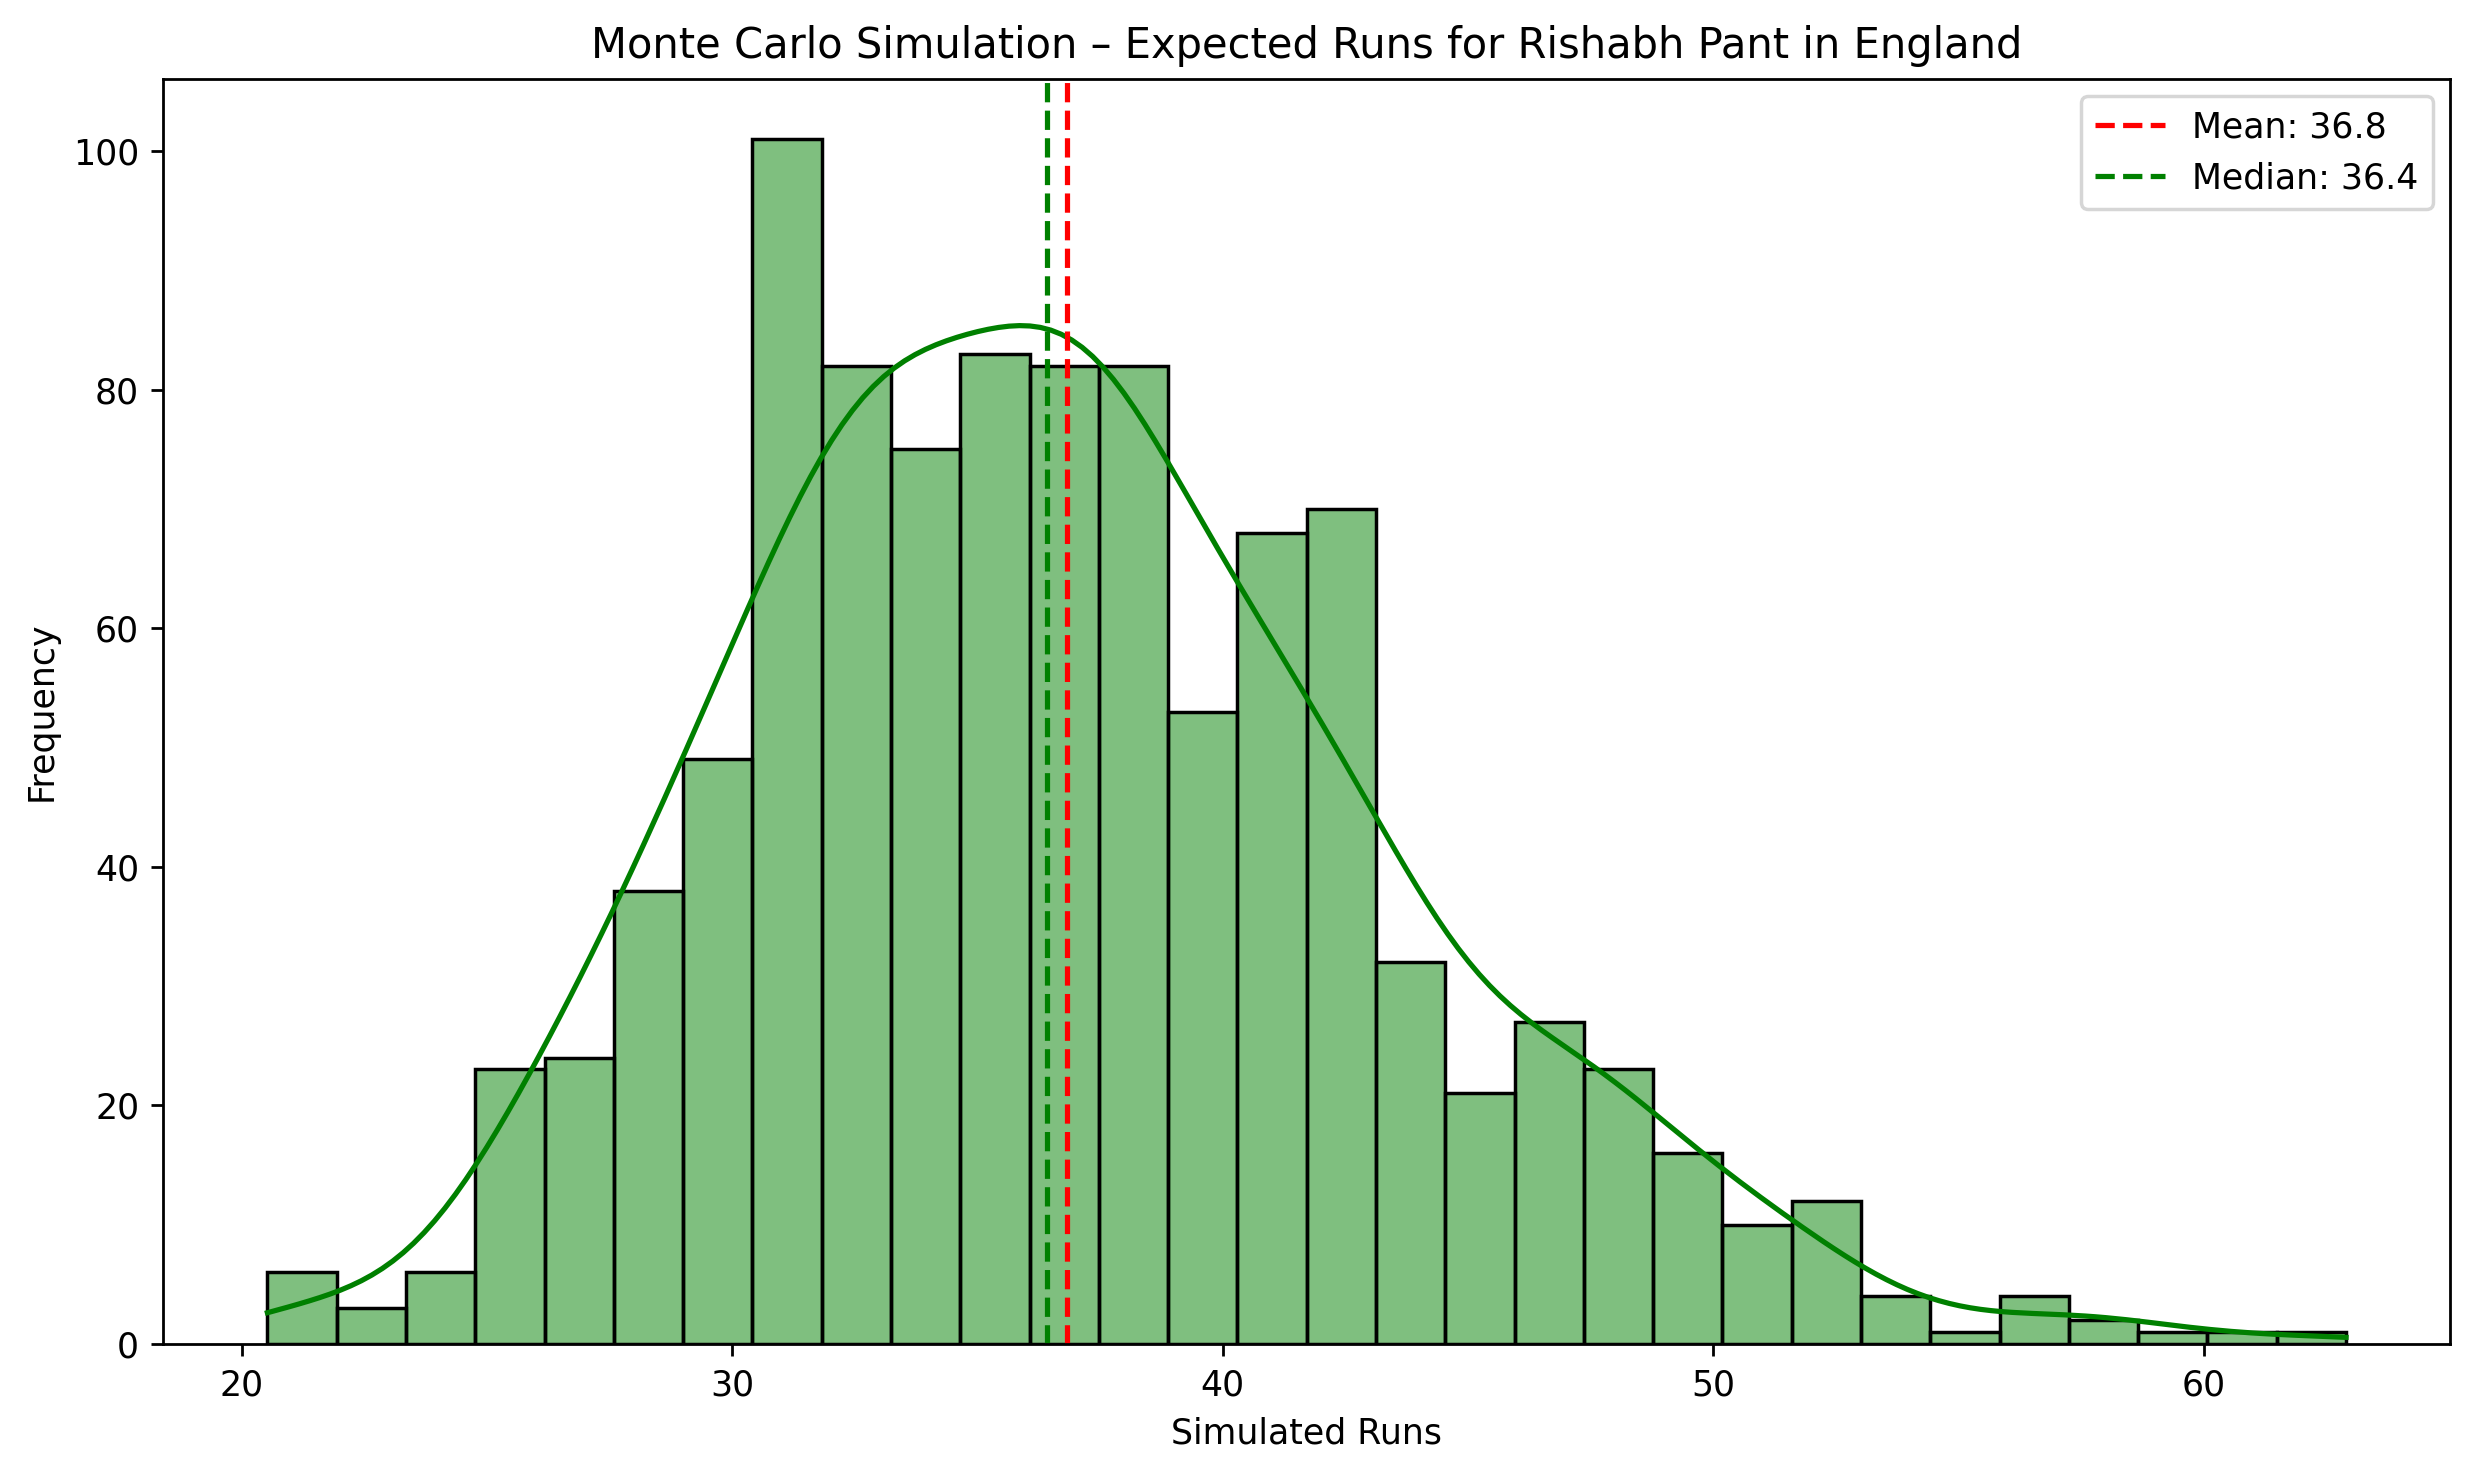

In [345]:
# Plotting
plt.figure(figsize=(10, 6), dpi = 250)
sns.histplot(runs_pant, bins = 30, kde = True, color = 'green', edgecolor = 'black')

plt.axvline(mean_score_pant, color = 'red', linestyle = '--', label = f"Mean: {mean_score_pant:.1f}")
plt.axvline(median_score_pant, color = 'green', linestyle = '--', label = f"Median: {median_score_pant:.1f}")
plt.title("Monte Carlo Simulation – Expected Runs for Rishabh Pant in England")
plt.xlabel("Simulated Runs")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

In [346]:
# KL Rahul

# Filter Rahul's data in SENA
rahul_sena = regional_stats[(regional_stats['Batter'] == 'KL Rahul') & (regional_stats['Region'] == 'SENA')]

# Calculate mean balls faced and mean strike rate
mean_balls_rahul = (rahul_sena['BF'].values[0]/(rahul_sena['Inns'].values[0] - rahul_sena['Not Out'].values[0])).round(2)
mean_sr_rahul = ((rahul_sena['Runs'].values[0] / rahul_sena['BF'].values[0]) * 100).round(2)

In [347]:
# Inputs for the Simulation
# Mean Balls Faced: 61.08
# Standard Deviation of Balls Faced: 15 (a reasonable assumption to allow variability across innings).
# Mean Strike Rate: 48.31
# Standard Deviation of Strike Rate: 5 (a conservative spread to allow match-to-match fluctuation)

std_balls_rahul = 15
variance_rahul = std_balls_rahul ** 2
mu_ln_rahul = np.log(mean_balls_rahul ** 2 / np.sqrt(variance_rahul + mean_balls_rahul ** 2))
sigma_ln_rahul = np.sqrt(np.log(1 + (variance_rahul / mean_balls_rahul ** 2)))

In [348]:
# Simulating Balls Faced and SR

np.random.seed(14)

# Simulating 1000 innings
n_simulations = 1000

# Simulating balls faced
balls_faced_rahul = np.random.lognormal(mean = mu_ln_rahul , sigma = sigma_ln_rahul, size = n_simulations)
balls_faced_rahul = np.clip(balls_faced_rahul, 1, 300).round()  # Min 1 ball faced

# Simulating strike rates
strike_rates_rahul = np.random.normal(loc = 48.31, scale = 5, size = n_simulations)
strike_rates_rahul = np.clip(strike_rates_rahul, 30, 120)  # Keeping SRs within cricket realism

In [349]:
# Seam Threat Index adjustment: England expected to use a heavy seam attack (e.g. Woakes, Carse, Tongue, Stokes)
# So, we're reducing Rahul's strike rate by 5% as a conservative penalty
adjusted_sr_rahul = mean_sr_rahul * 0.95  # 5% penalty due to seam-dominant conditions

# Simulating 1000 innings
runs_rahul = (balls_faced_rahul * adjusted_sr_rahul) / 100

In [350]:
mean_score_rahul = np.mean(runs_rahul)
median_score_rahul = np.median(runs_rahul)
percentile_25_rahul = np.percentile(runs_rahul, 25)
percentile_75_rahul = np.percentile(runs_rahul, 75)

# Probabilities
prob_50_plus_rahul = np.mean(runs_rahul >= 50) * 100
prob_100_plus_rahul = np.mean(runs_rahul >= 100) * 100

print(f"Expected Score (Mean): {mean_score_rahul:.2f}")
print(f"Median Score: {median_score_rahul:.2f}")
print(f"IQR: {percentile_25_rahul:.2f} – {percentile_75_rahul:.2f}")
print(f"Chance of scoring 50+: {prob_50_plus_rahul:.1f}%")
print(f"Chance of scoring 100+: {prob_100_plus_rahul:.1f}%")

Expected Score (Mean): 27.48
Median Score: 26.62
IQR: 22.49 – 31.21
Chance of scoring 50+: 0.5%
Chance of scoring 100+: 0.0%


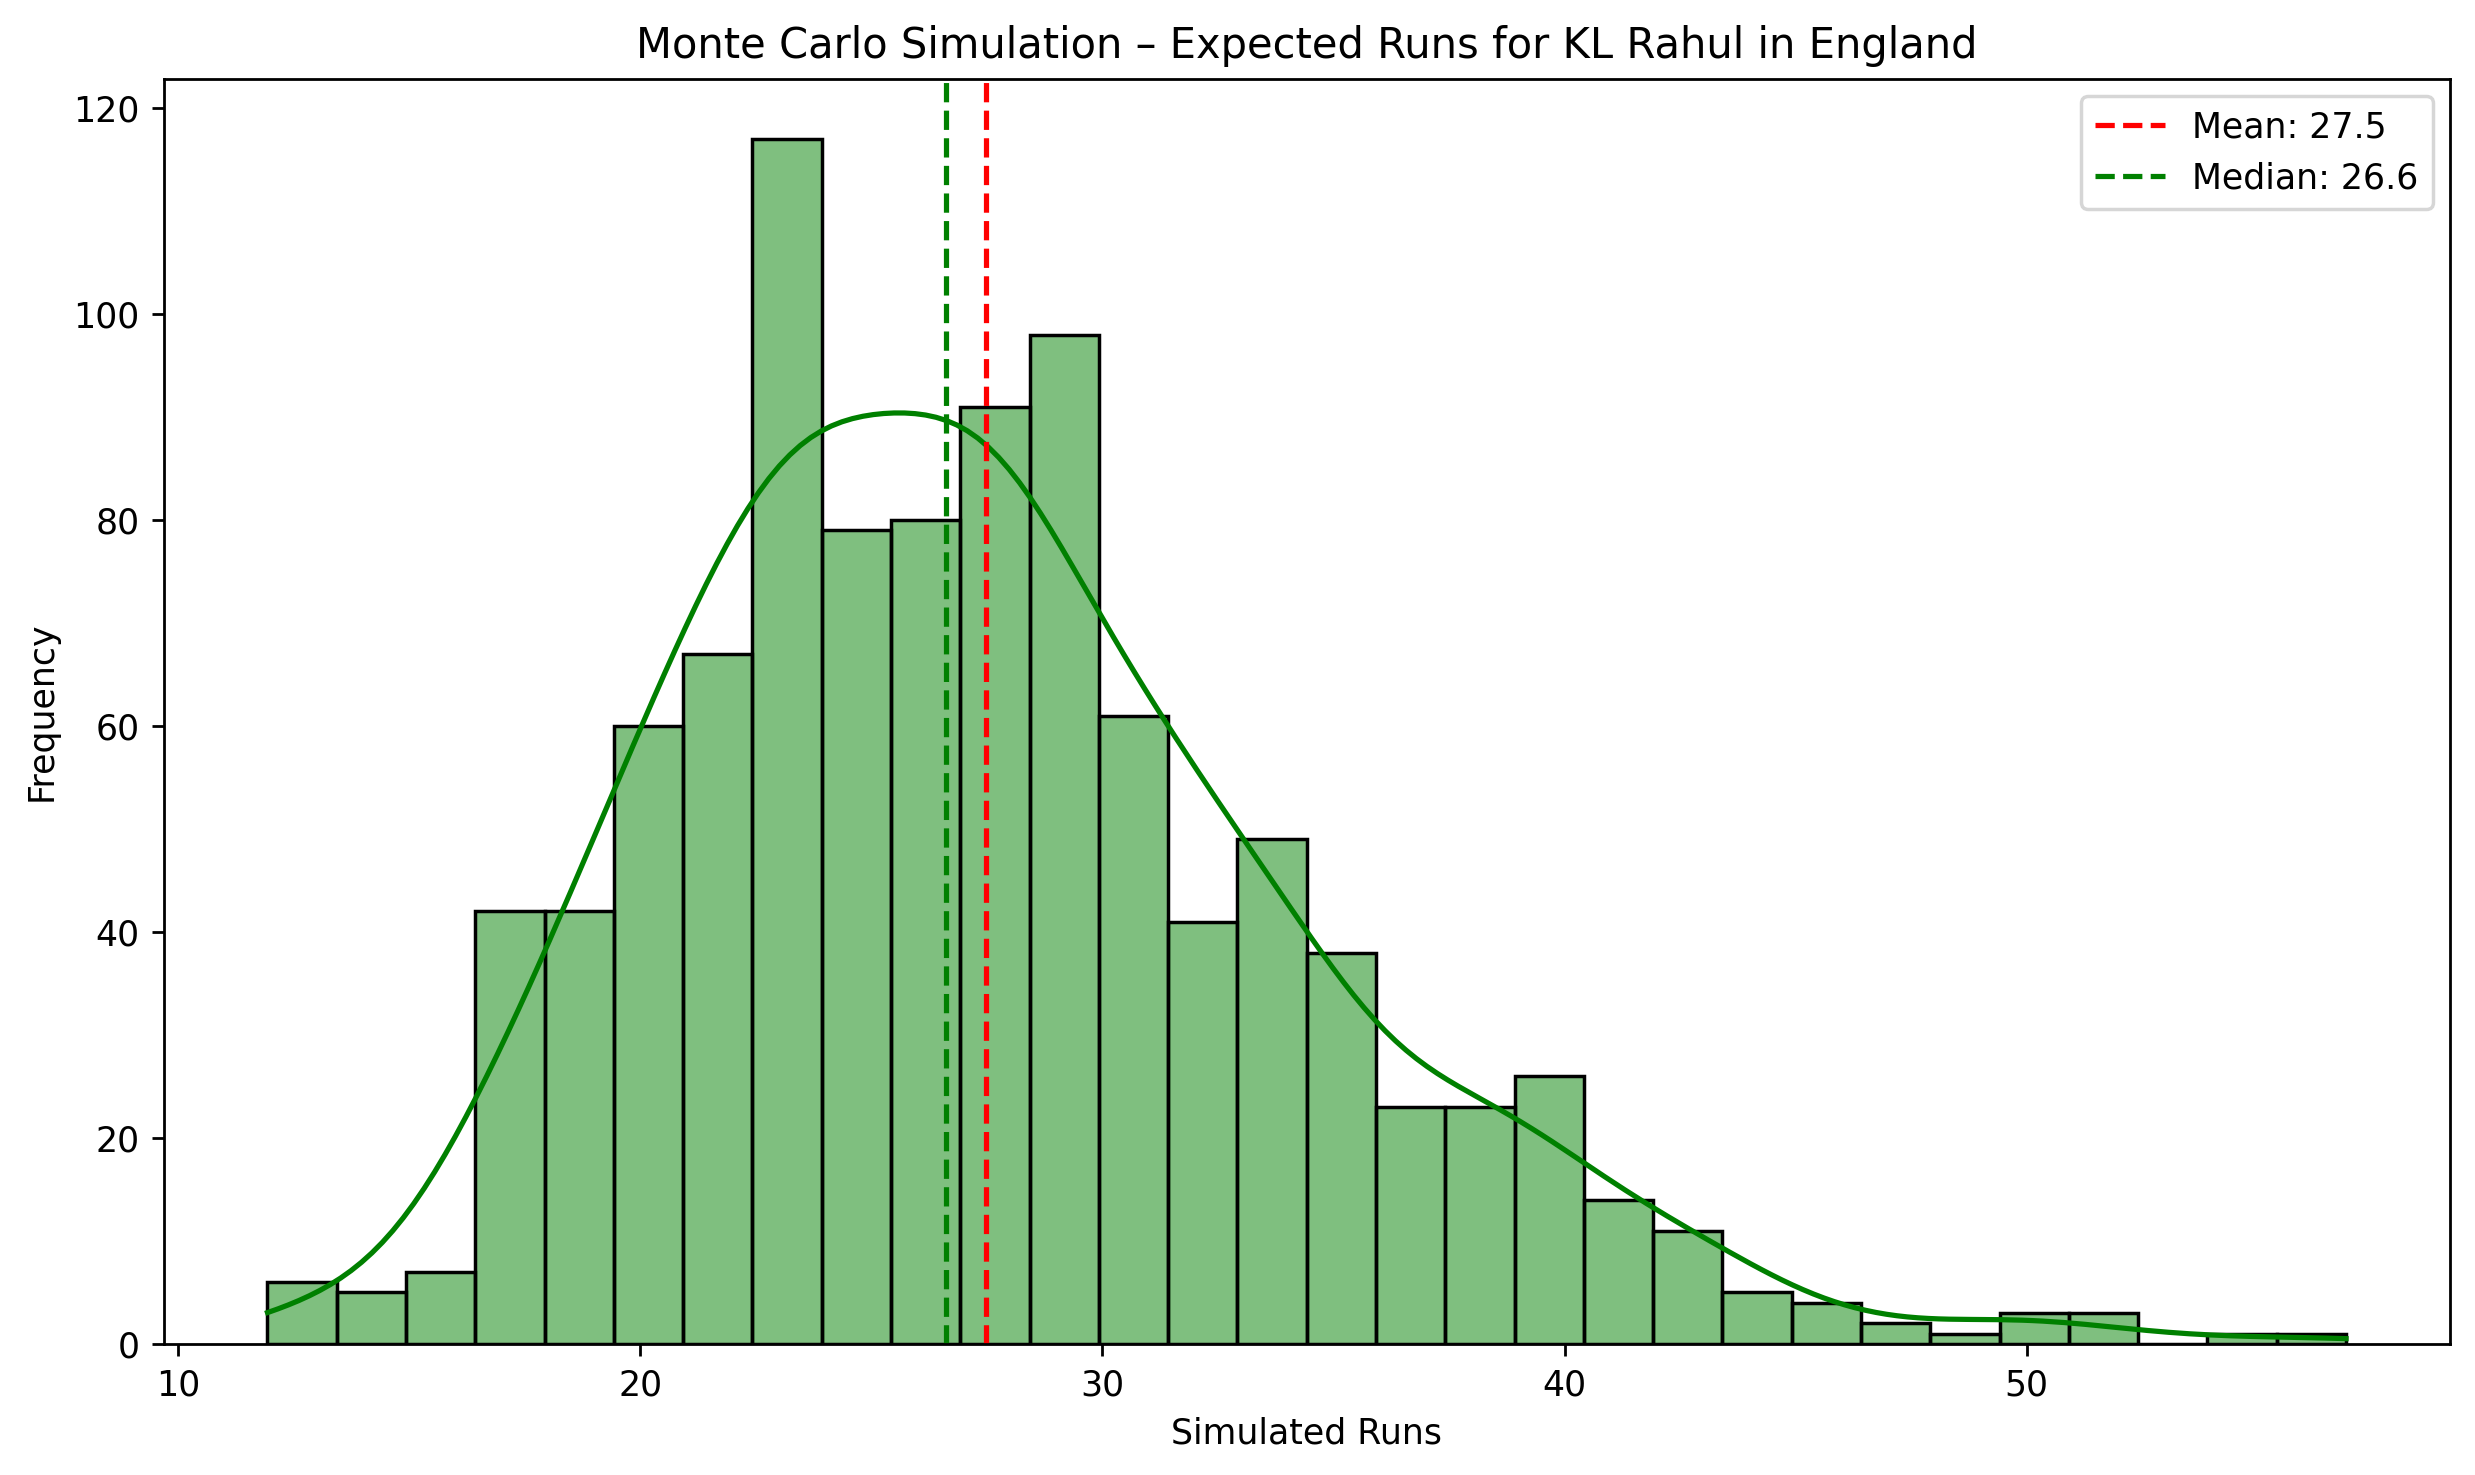

In [351]:
# Plotting
plt.figure(figsize=(10, 6), dpi = 250)
sns.histplot(runs_rahul, bins = 30, kde = True, color = 'green', edgecolor = 'black')

plt.axvline(mean_score_rahul, color = 'red', linestyle = '--', label = f"Mean: {mean_score_rahul:.1f}")
plt.axvline(median_score_rahul, color = 'green', linestyle = '--', label = f"Median: {median_score_rahul:.1f}")
plt.title("Monte Carlo Simulation – Expected Runs for KL Rahul in England")
plt.xlabel("Simulated Runs")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

In [361]:
# NK Reddy

# Filter Reddy's data in SENA
nkr_sena = regional_stats[(regional_stats['Batter'] == 'Nitish Reddy') & (regional_stats['Region'] == 'SENA')]

# Calculate mean balls faced and mean strike rate
mean_balls_nkr = (nkr_sena['BF'].values[0]/(nkr_sena['Inns'].values[0] - nkr_sena['Not Out'].values[0])).round(2)
mean_sr_nkr = ((nkr_sena['Runs'].values[0] / nkr_sena['BF'].values[0]) * 100).round(2)

In [353]:
# Inputs for the Simulation
# Mean Balls Faced: 58
# Standard Deviation of Balls Faced: 15 (a reasonable assumption to allow variability across innings).
# Mean Strike Rate: 64.22
# Standard Deviation of Strike Rate: 5 (a conservative spread to allow match-to-match fluctuation)

std_balls_nkr = 15
variance_nkr = std_balls_nkr ** 2
mu_ln_nkr = np.log(mean_balls_nkr ** 2 / np.sqrt(variance_nkr + mean_balls_nkr ** 2))
sigma_ln_nkr = np.sqrt(np.log(1 + (variance_nkr / mean_balls_nkr ** 2)))

In [354]:
# Simulating Balls Faced and SR

np.random.seed(14)

# Simulating 1000 innings
n_simulations = 1000

# Simulating balls faced
balls_faced_nkr = np.random.lognormal(mean = mu_ln_nkr , sigma = sigma_ln_nkr, size = n_simulations)
balls_faced_nkr = np.clip(balls_faced_nkr, 1, 300).round()  # Min 1 ball faced

# Simulating strike rates
strike_rates_nkr = np.random.normal(loc = 64.22, scale = 5, size = n_simulations)
strike_rates_nkr = np.clip(strike_rates_nkr, 30, 120)  # Keeping SRs within cricket realism

In [355]:
# Seam Threat Index adjustment: England expected to use a heavy seam attack (e.g. Woakes, Carse, Tongue, Stokes)
# No penalty for NKR, has the best dismissal rate against pace out of all the batsmen (although, the small sample size should also be considered)

runs_nkr = (balls_faced_nkr * mean_sr_nkr) / 100

In [356]:
mean_score_nkr = np.mean(runs_nkr)
median_score_nkr = np.median(runs_nkr)
percentile_25_nkr = np.percentile(runs_nkr, 25)
percentile_75_nkr = np.percentile(runs_nkr, 75)

# Probabilities
prob_50_plus_nkr = np.mean(runs_nkr >= 50) * 100
prob_100_plus_nkr = np.mean(runs_nkr >= 100) * 100

print(f"Expected Score (Mean): {mean_score_nkr:.2f}")
print(f"Median Score: {median_score_nkr:.2f}")
print(f"IQR: {percentile_25_nkr:.2f} – {percentile_75_nkr:.2f}")
print(f"Chance of scoring 50+: {prob_50_plus_nkr:.1f}%")
print(f"Chance of scoring 100+: {prob_100_plus_nkr:.1f}%")

Expected Score (Mean): 36.47
Median Score: 35.32
IQR: 29.54 – 41.74
Chance of scoring 50+: 10.2%
Chance of scoring 100+: 0.0%


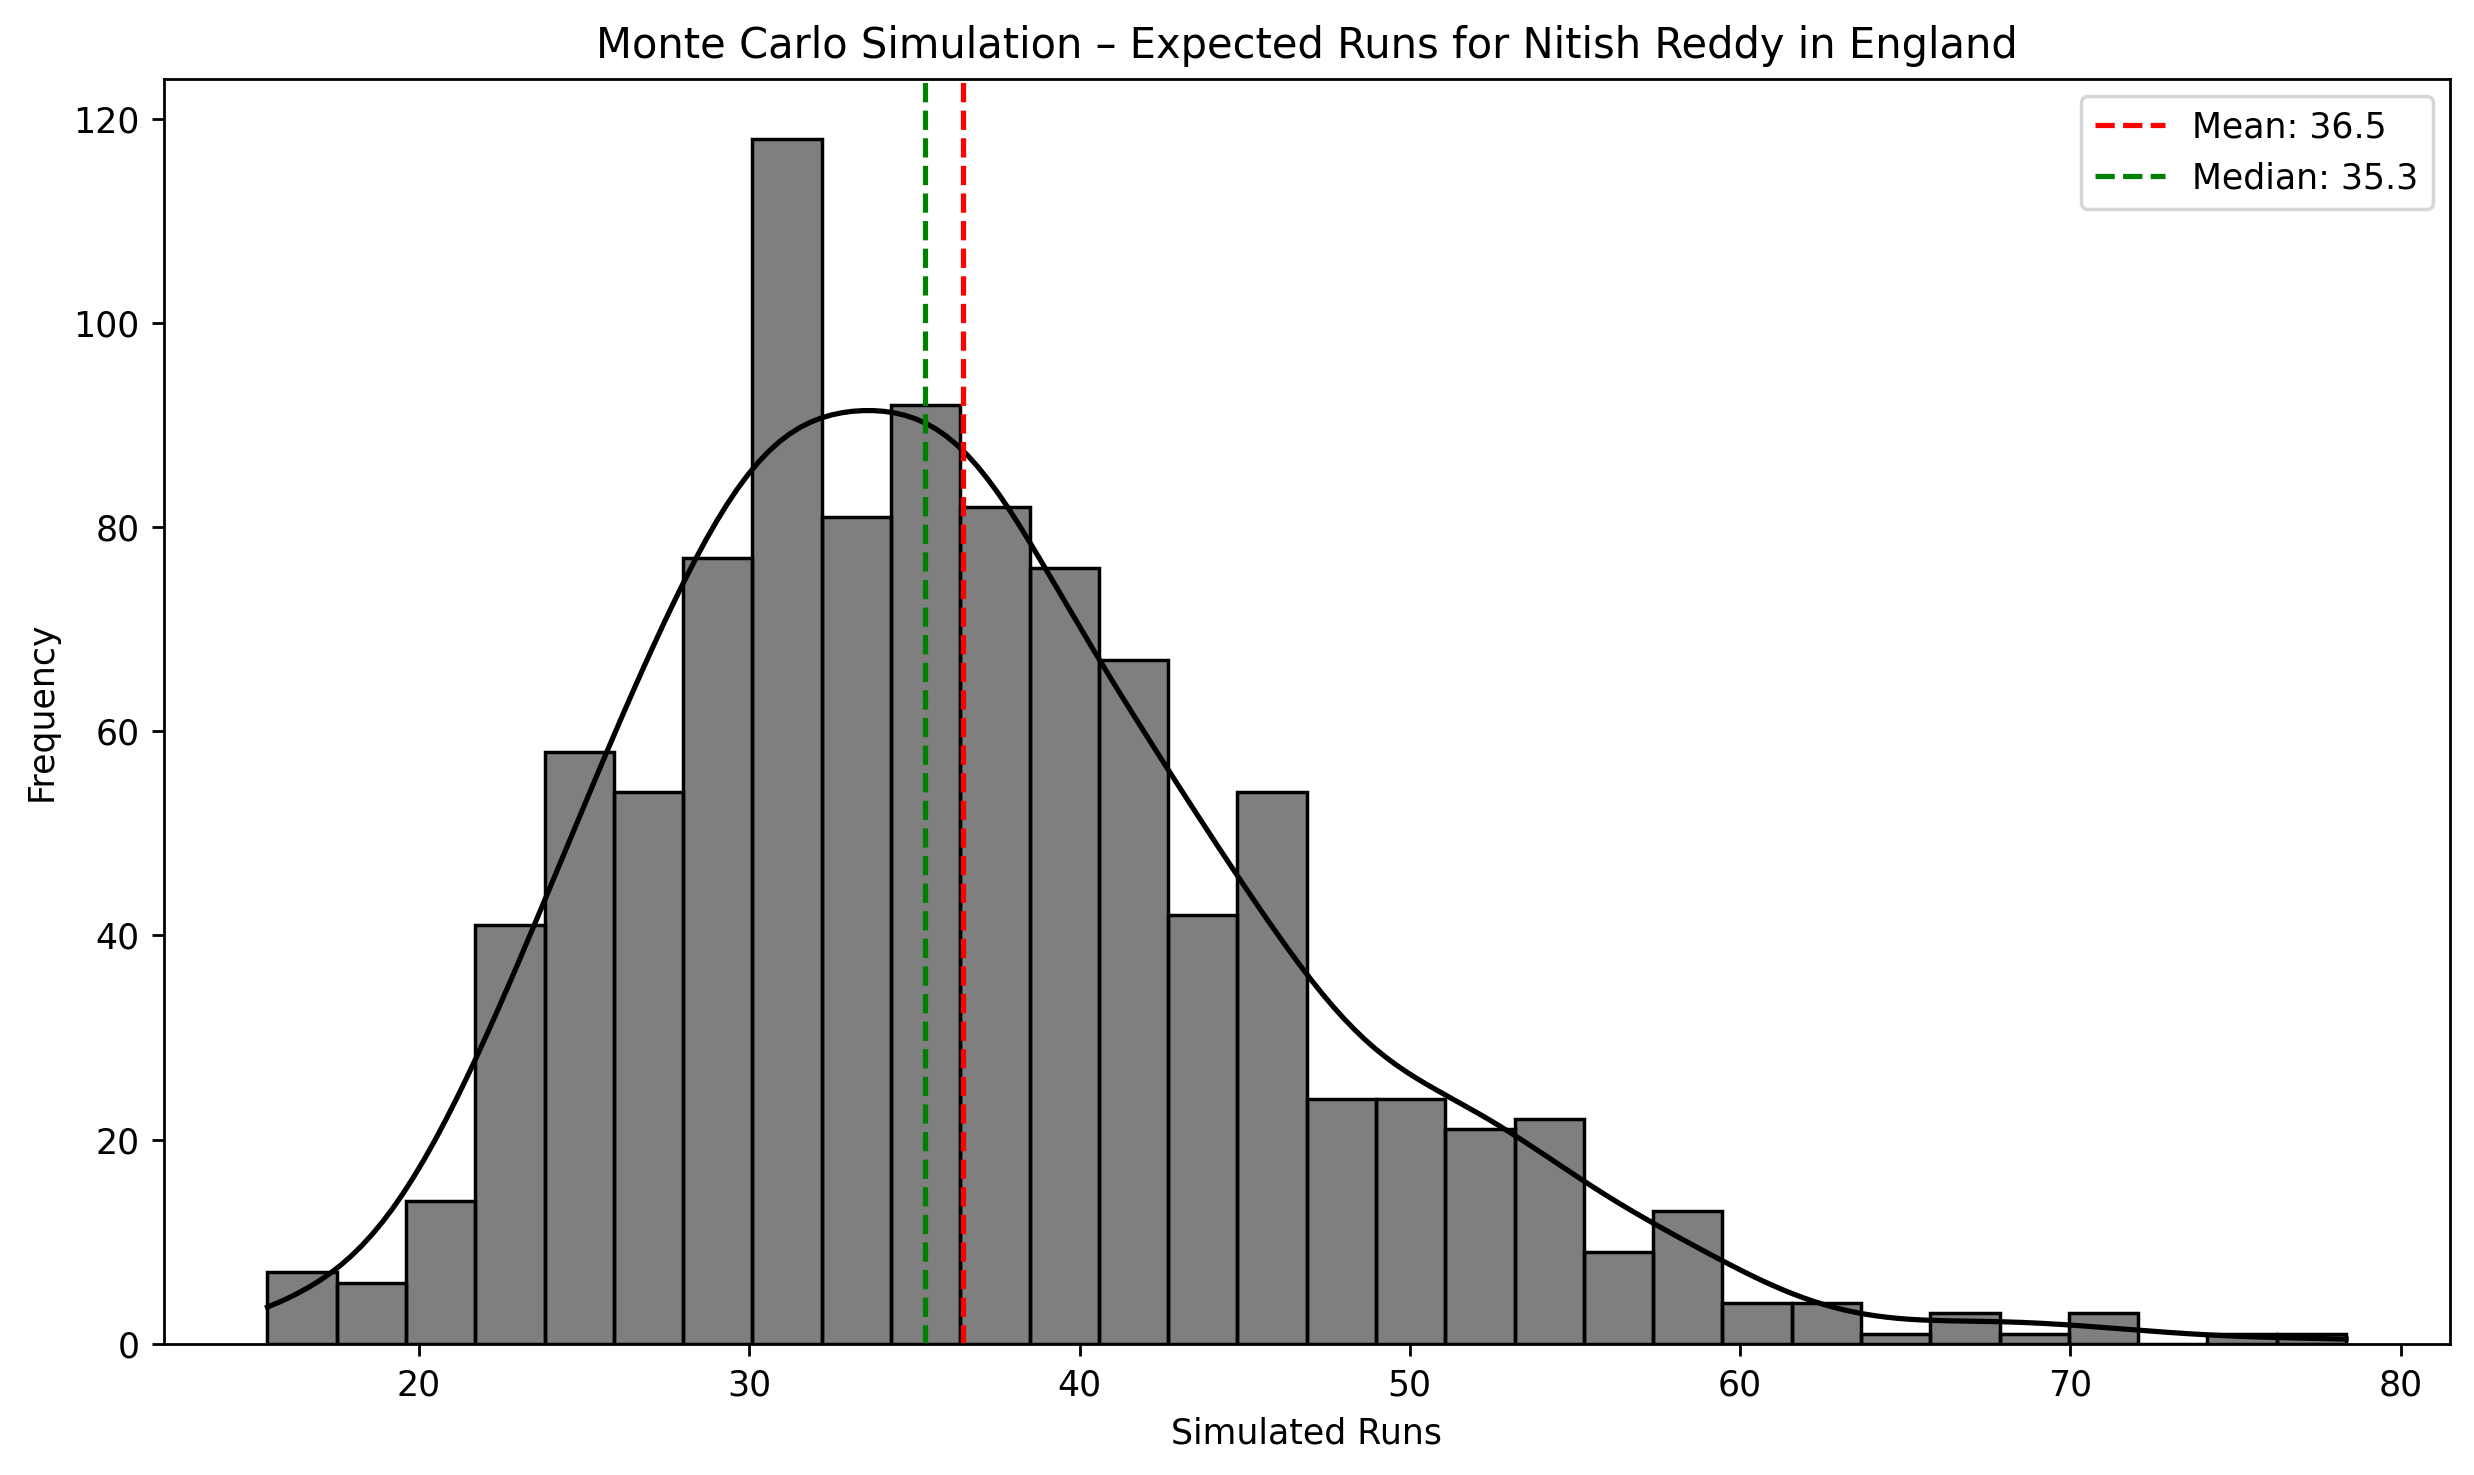

In [371]:
# Plotting
plt.figure(figsize=(10, 6), dpi = 250)
sns.histplot(runs_nkr, bins = 30, kde = True, color = 'black', edgecolor = 'black')

plt.axvline(mean_score_nkr, color = 'red', linestyle = '--', label = f"Mean: {mean_score_nkr:.1f}")
plt.axvline(median_score_nkr, color = 'green', linestyle = '--', label = f"Median: {median_score_nkr:.1f}")
plt.title("Monte Carlo Simulation – Expected Runs for Nitish Reddy in England")
plt.xlabel("Simulated Runs")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

In [372]:
# Line plot for cumulative simulated runs across 10 innings

import plotly.graph_objects as go

# Simulated data:
simulated_runs_gill = np.random.choice(runs_gill, size=(1000, 10))
simulated_runs_pant = np.random.choice(runs_pant, size=(1000, 10))
simulated_runs_jaiswal = np.random.choice(runs_jaiswal, size=(1000, 10))
simulated_runs_rahul = np.random.choice(runs_rahul, size=(1000, 10))
simulated_runs_nkr = np.random.choice(runs_nkr, size=(1000, 10))


# Mean runs per innings:
gill_means = simulated_runs_gill.mean(axis=0).cumsum()
pant_means = simulated_runs_pant.mean(axis=0).cumsum()
jaiswal_means = simulated_runs_jaiswal.mean(axis=0).cumsum()
rahul_means = simulated_runs_rahul.mean(axis=0).cumsum()
nkr_means = simulated_runs_nkr.mean(axis=0).cumsum()

innings = np.arange(1, 11)

# Plotting
fig = go.Figure()

fig.add_trace(go.Scatter(x = innings, y=gill_means, mode = 'lines+markers', name = 'Gill', line = dict(color='crimson')))
fig.add_trace(go.Scatter(x = innings, y=pant_means, mode = 'lines+markers', name = 'Pant', line = dict(color='royalblue')))
fig.add_trace(go.Scatter(x = innings, y=jaiswal_means, mode = 'lines+markers', name = 'Jaiswal', line = dict(color='seagreen')))
fig.add_trace(go.Scatter(x = innings, y=rahul_means, mode = 'lines+markers', name = 'Rahul', line = dict(color='orange')))
fig.add_trace(go.Scatter(x = innings, y=nkr_means, mode = 'lines+markers', name = 'Nitish Reddy', line = dict(color='black')))

fig.update_layout(
    title = 'Cumulative Expected Runs Across 10 Innings (Monte Carlo Mean)',
    xaxis_title = 'Innings Number',
    yaxis_title = 'Cumulative Runs',
    template = 'plotly_white'
)

fig.show()